## Библиотеки

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import time

from IPython import display
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
names =['id', 'headline', 'description', 'article_body', 'all_text', 'text_lem',
       'date', 'newspaper', 'city', 'md_index', 'url', 'top', 'sup0', 'sup1',
       'sup2', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32',
       'max_topics', 'max_values', 'max_values_norm', 'positive_mean',
       'negative_mean', 'neutral_mean', 'speech_mean', 'skip_mean',
       'positive_75', 'negative_75', 'neutral_75', 'speech_75', 'skip_75',
       'positive_max', 'negative_max', 'neutral_max', 'speech_max',
       'skip_max']

data = pd.read_excel('SV-data-fin.xlsx',
                     index_col = 0,
                     names = names)

data['date'] = pd.to_datetime(data['date'])

data

,id,headline,description,article_body,all_text,text_lem,date,newspaper,city,md_index,...,positive_75,negative_75,neutral_75,speech_75,skip_75,positive_max,negative_max,neutral_max,speech_max,skip_max
0,1,«Женщины для утех» по-прежнему нужны: Япония и...,Во время колонизации Кореи Японией в XX веке к...,Во время колонизации Кореи Японией в XX веке к...,«Женщины для утех» по-прежнему нужны: Япония и...,женщина утеха нужный япония китай борьба время...,2016-01-03,ИА Regnum,Москва,2.312,...,0.103759,0.294225,0.731069,0.014967,0.100889,0.182436,0.921932,0.893319,0.055015,0.196836
1,2,В Норвегии мигрантов научат не насиловать женщин,Наплыв беженцев из Сирии и других стран Ближне...,\n ...,В Норвегии мигрантов научат не насиловать женщ...,норвегия мигрант научить насиловать беженец си...,2016-01-04,Известия (iz.ru),Москва,1.113,...,0.083908,0.150050,0.907021,0.008857,0.129453,0.239359,0.538993,0.991948,0.044691,0.414909
2,3,Меркель потребовала дать жесткий ответ на напа...,\tКанцлер Германии Ангела Меркель потребовала ...,"Сейчас+6˚CСейчас в Санкт-ПетербургеОблачно, Бе...",Меркель потребовала дать жесткий ответ на напа...,меркель потребовать дать жёсткий ответ нападен...,2016-01-05,ИА Фергана,Москва,0.177,...,0.060194,0.164281,0.885853,0.011697,0.134796,0.098089,0.484390,0.990597,0.020342,0.453272
3,4,Полиция Кельна опровергла сообщения о нападени...,Канцлер ФРГ Ангела Меркель назвала правонаруше...,Об этом сообщил спикер правительства ФРГ Штефф...,Полиция Кельна опровергла сообщения о нападени...,полиция кёльн опровергнуть сообщение нападение...,2016-01-05,РБК (rbc.ru),Москва,3.048,...,0.072169,0.186454,0.865658,0.013655,0.077533,0.119213,0.212079,0.962683,0.046044,0.080367
4,5,В Кельне задержали троих подозреваемых в напад...,В Кельне задержали троих подозреваемых в напад...,В Кельне задержали троих подозреваемых в напад...,В Кельне задержали троих подозреваемых в напад...,кёльн задержать трое подозревать нападение кёл...,2016-01-06,РБК (rbc.ru),Москва,2.295,...,0.082707,0.248009,0.894790,0.003717,0.173298,0.960371,0.839744,1.000010,0.075868,0.692652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15337,15338,Стало известно о гибели в зоне СВО «тулунского...,Заключивший контракт с одной из частных военны...,\n\n\n\n\nЗаключивший контракт с одной из част...,Стало известно о гибели в зоне СВО «тулунского...,стать известно гибель зона сво тулунский манья...,2023-12-28,Свободная пресса (svpressa.ru),Москва,1.472,...,0.067557,0.248032,0.951152,0.007024,0.112805,0.307368,0.600198,0.999384,0.060097,0.287778
15338,15339,Брата Майкла Джексона обвинили в изнасиловании,Брата американского поп-исполнителя Майкла Дже...,\n ...,Брата Майкла Джексона обвинили в изнасиловании...,брат майкл джексон обвинить американский майкл...,2023-12-29,Известия (iz.ru),Москва,1.290,...,0.224392,0.217535,0.935144,0.013155,0.087863,0.256842,0.546748,0.974831,0.028446,0.187143
15339,15340,Просто эпидемия: старшего брата Майкла Джексон...,"Основателя группы The Jackson 5, старшего брат...","Основателя группы The Jackson 5, старшего брат...",Просто эпидемия: старшего брата Майкла Джексон...,просто эпидемия старший брат майкл джексон обв...,2023-12-29,Eadaily.com,Москва,1.472,...,0.061886,0.129413,0.946607,0.008857,0.112805,0.085109,0.228166,0.991948,0.012064,0.191943
15340,15341,Более 600 деятелей культуры осудили обвиняемог...,Более 600 деятелей культуры осудили обвиняемог...,"30 декабря 2023, 11:49 — Общественная служба...",Более 600 деятелей культуры осудили обвиняемог...,деятель культура осудить обвинять домогательст...,2023-12-30,Комсомольская правда (kp.ru),Москва,0.595,...,0.080269,0.198516,0.807473,0.037646,0.098841,0.492198,0.281416,0.980291,0.043376,0.250923


In [10]:
dates = data.groupby(['date']).size().index
counts = pd.DataFrame(data.groupby(['date']).size(),
                      columns = ['count'])
counts.insert(0, 'date', dates)
counts = counts.set_index(np.arange(0, counts.shape[0]))
counts

,date,count
0,2016-01-03,1
1,2016-01-04,1
2,2016-01-05,2
3,2016-01-06,5
4,2016-01-07,11
...,...,...
2592,2023-12-26,17
2593,2023-12-27,4
2594,2023-12-28,7
2595,2023-12-29,2


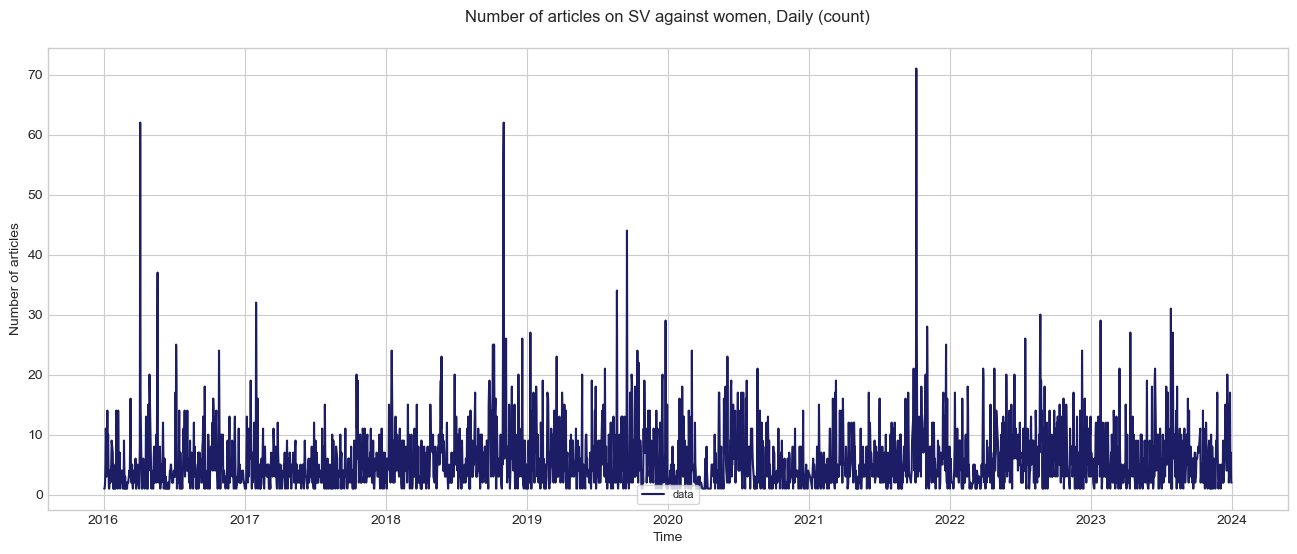

In [11]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(16, 6))
plt.plot(counts['date'], counts['count'].values, '#1D1D65', label='data')
plt.xlabel('Time')
plt.ylabel('Number of articles')
plt.title('Number of articles on SV against women, Daily (count)\n')
plt.legend(prop={'size': 8}, frameon=True, loc='lower center', ncol=2)
plt.savefig('daily.png')
plt.show()

In [12]:
pd.Grouper(freq='M')
counts.date[0]
counts.groupby(pd.Grouper(key = 'date', freq='M'))

In [13]:
dates_m = counts.groupby(pd.Grouper(key = 'date', freq='M')).size().index
counts_m = pd.DataFrame(counts.groupby(pd.Grouper(key = 'date', freq='M')).sum(),
                        columns = ['count'])
counts_m.insert(0, 'date', dates_m)
counts_m = counts_m.set_index(np.arange(0, counts_m.shape[0]))
counts_m

,date,count
0,2016-01-31,120
1,2016-02-29,112
2,2016-03-31,82
3,2016-04-30,197
4,2016-05-31,152
...,...,...
91,2023-08-31,213
92,2023-09-30,157
93,2023-10-31,149
94,2023-11-30,146


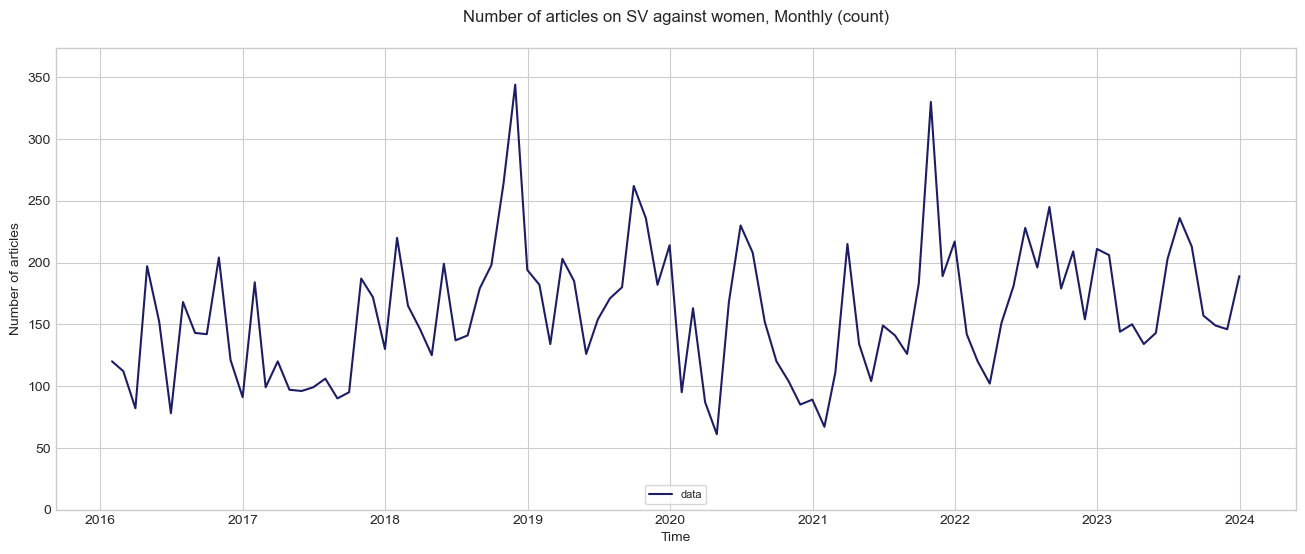

In [14]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(16, 6))
plt.plot(counts_m['date'], counts_m['count'].values, '#1D1D65', label='data')
plt.xlabel('Time')
plt.ylabel('Number of articles')
plt.title('Number of articles on SV against women, Monthly (count)\n')
plt.legend(prop={'size': 8}, frameon=True, loc='lower center', ncol=2)
plt.ylim(0, counts_m['count'].max()+30)
plt.savefig('monthly.png')
plt.show()

In [8]:
dates_y = counts.groupby(pd.Grouper(key = 'date', freq='Y')).size().index
counts_y = pd.DataFrame(counts.groupby(pd.Grouper(key = 'date', freq='Y')).mean(),
                        columns = ['count'])
counts_y.insert(0, 'date', dates_y)
counts_y = counts_y.set_index(np.arange(0, counts_y.shape[0]))
counts_y

,date,count
0,2016-12-31,NaN
1,2017-12-31,NaN
2,2018-12-31,NaN
3,2019-12-31,NaN
4,2020-12-31,NaN
5,2021-12-31,NaN
6,2022-12-31,NaN
7,2023-12-31,NaN


ValueError: Axis limits cannot be NaN or Inf

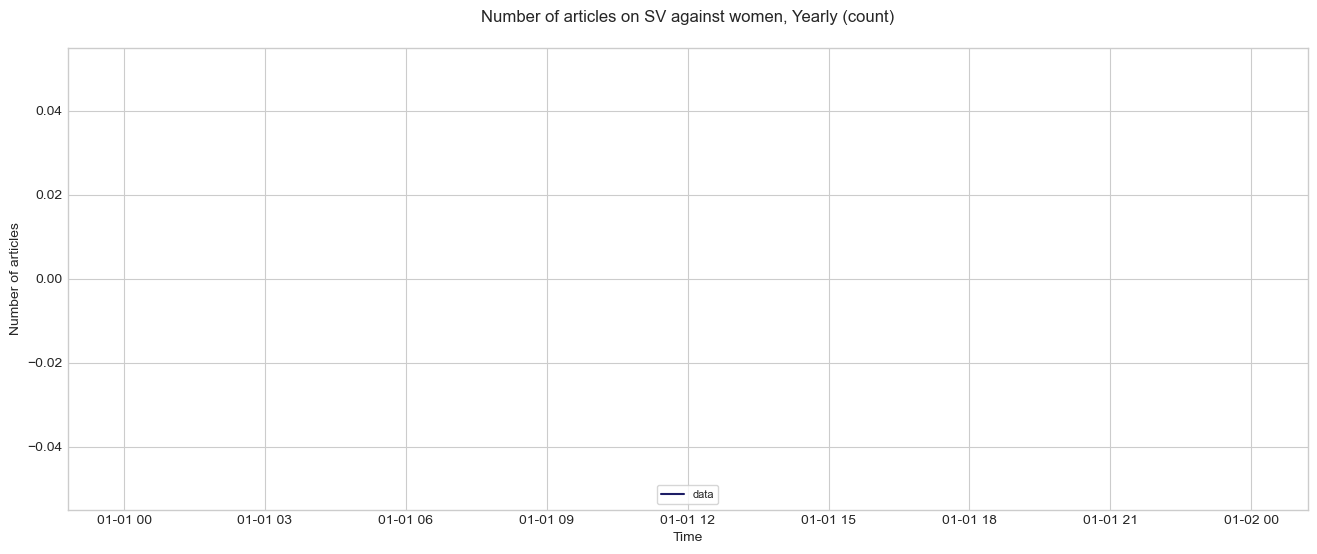

In [9]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(16, 6))
plt.plot(counts_y['date'], counts_y['count'].values, '#1D1D65', label='data')
plt.xlabel('Time')
plt.ylabel('Number of articles')
plt.title('Number of articles on SV against women, Yearly (count)\n')
plt.legend(prop={'size': 8}, frameon=True, loc='lower center', ncol=2)
plt.ylim(0, counts_y['count'].max()*2)
plt.show()

In [18]:
data.describe()

,id,date,md_index,top,sup0,sup1,sup2,0,1,2,...,positive_75,negative_75,neutral_75,speech_75,skip_75,positive_max,negative_max,neutral_max,speech_max,skip_max
count,15342.00000,15342,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000,...,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000
mean,7671.50000,2020-03-06 20:30:52.796245504,1.233799,0.246638,0.056227,0.059834,0.080453,0.010186,0.004591,0.015571,...,0.073751,0.220565,0.819967,0.011468,0.142566,0.183088,0.398491,0.927878,0.036446,0.294990
min,1.00000,2016-01-03 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002262,0.011495,0.254733,0.000546,0.025504,0.002262,0.040856,0.268951,0.001144,0.028446
25%,3836.25000,2018-05-21 00:00:00,0.700250,0.021118,0.000000,0.000000,0.011342,0.000000,0.000000,0.000000,...,0.050341,0.170409,0.760661,0.006619,0.100889,0.087574,0.268951,0.896261,0.015435,0.168867
50%,7671.50000,2020-01-21 00:00:00,1.148000,0.134438,0.020001,0.036934,0.041843,0.000000,0.000000,0.000000,...,0.067557,0.213319,0.836355,0.009749,0.132372,0.136618,0.362979,0.964865,0.025189,0.250923
75%,11506.75000,2022-03-28 00:00:00,1.664000,0.436977,0.076734,0.092646,0.118891,0.000000,0.000000,0.000000,...,0.090103,0.262852,0.897625,0.014080,0.172259,0.222710,0.500010,0.991948,0.039649,0.384922
max,15342.00000,2023-12-30 00:00:00,3.996000,0.980871,0.658457,0.447578,0.717087,0.453593,0.450543,0.774293,...,0.345192,0.618327,1.000010,0.168932,0.692159,1.000010,0.997459,1.000010,1.000010,0.988678
std,4428.99825,NaN,0.692805,0.263971,0.085470,0.066919,0.097825,0.034934,0.026611,0.063905,...,0.034022,0.069726,0.105624,0.007707,0.058977,0.149752,0.177996,0.093412,0.051376,0.169178


In [19]:
data.columns

Index(['id', 'headline', 'description', 'article_body', 'all_text', 'text_lem',
       'date', 'newspaper', 'city', 'md_index', 'url', 'top', 'sup0', 'sup1',
       'sup2', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', 'max_topics',
       'max_values', 'max_values_norm', 'positive_mean', 'negative_mean',
       'neutral_mean', 'speech_mean', 'skip_mean', 'positive_75',
       'negative_75', 'neutral_75', 'speech_75', 'skip_75', 'positive_max',
       'negative_max', 'neutral_max', 'speech_max', 'skip_max'],
      dtype='object')

In [20]:
cities = data.city.value_counts()
cities.to_excel('cities.xlsx')

In [21]:
counts

,date,count
0,2016-01-03,1
1,2016-01-04,1
2,2016-01-05,2
3,2016-01-06,5
4,2016-01-07,11
...,...,...
2592,2023-12-26,17
2593,2023-12-27,4
2594,2023-12-28,7
2595,2023-12-29,2


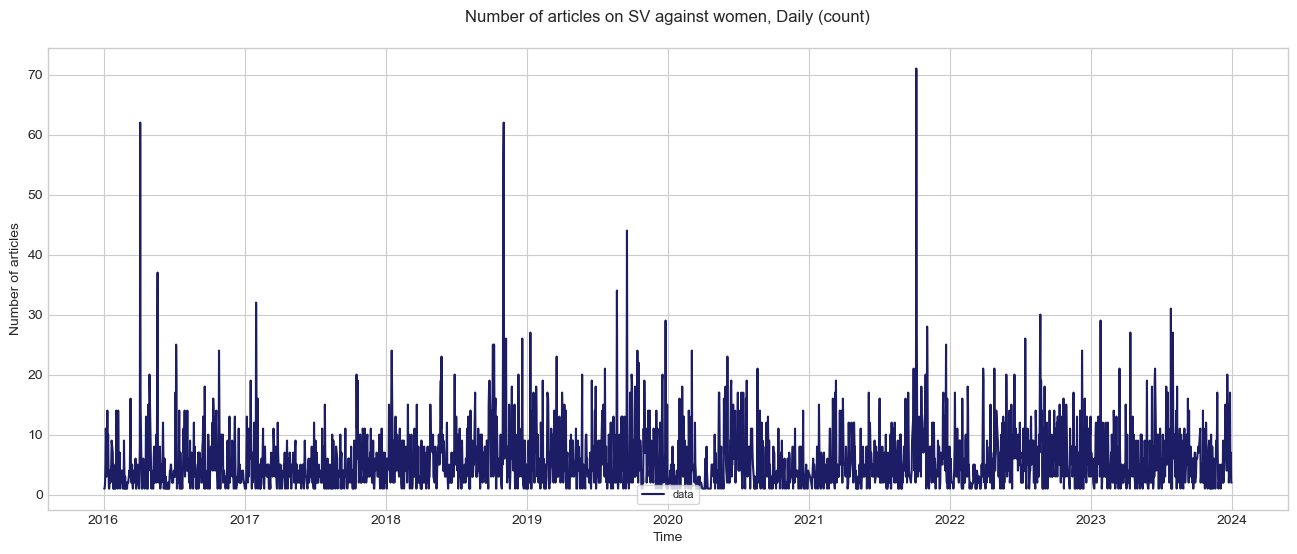

In [22]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(16, 6))
plt.plot(counts['date'], counts['count'].values, '#1D1D65', label='data')
plt.xlabel('Time')
plt.ylabel('Number of articles')
plt.title('Number of articles on SV against women, Daily (count)\n')
plt.legend(prop={'size': 8}, frameon=True, loc='lower center', ncol=2)
plt.savefig('daily.png')
plt.show()

In [23]:
dates = data.groupby(['date']).size().index
counts = pd.DataFrame(data.groupby(['date']).size(),
                      columns = ['count'])
counts.insert(0, 'date', dates)
counts = counts.set_index(np.arange(0, counts.shape[0]))
counts

,date,count
0,2016-01-03,1
1,2016-01-04,1
2,2016-01-05,2
3,2016-01-06,5
4,2016-01-07,11
...,...,...
2592,2023-12-26,17
2593,2023-12-27,4
2594,2023-12-28,7
2595,2023-12-29,2


In [24]:
data.columns

Index(['id', 'headline', 'description', 'article_body', 'all_text', 'text_lem',
       'date', 'newspaper', 'city', 'md_index', 'url', 'top', 'sup0', 'sup1',
       'sup2', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', 'max_topics',
       'max_values', 'max_values_norm', 'positive_mean', 'negative_mean',
       'neutral_mean', 'speech_mean', 'skip_mean', 'positive_75',
       'negative_75', 'neutral_75', 'speech_75', 'skip_75', 'positive_max',
       'negative_max', 'neutral_max', 'speech_max', 'skip_max'],
      dtype='object')

In [25]:
date = data.date
counts

,date,count
0,2016-01-03,1
1,2016-01-04,1
2,2016-01-05,2
3,2016-01-06,5
4,2016-01-07,11
...,...,...
2592,2023-12-26,17
2593,2023-12-27,4
2594,2023-12-28,7
2595,2023-12-29,2


In [26]:
counts = data['3'].groupby(by=date).count()
dates = data.groupby(['date']).size().index
counts = pd.DataFrame(data.groupby(['date']).size(),
                      columns = ['count'])
counts.insert(0, 'date', dates)
counts = counts.set_index(np.arange(0, counts.shape[0]))
counts

,date,count
0,2016-01-03,1
1,2016-01-04,1
2,2016-01-05,2
3,2016-01-06,5
4,2016-01-07,11
...,...,...
2592,2023-12-26,17
2593,2023-12-27,4
2594,2023-12-28,7
2595,2023-12-29,2


In [27]:
data['8'] !=0
pd.DataFrame((data['8'] !=0).groupby(by=date).sum())

,8
date,
2016-01-03,0
2016-01-04,0
2016-01-05,0
2016-01-06,1
2016-01-07,0
...,...
2023-12-26,5
2023-12-27,1
2023-12-28,1


In [28]:
counts = pd.DataFrame(pd.DataFrame((data['0']).groupby(by=date).sum(),
                      columns = ['0']))
counts.insert(0, 'date', dates)
counts = counts.set_index(np.arange(0, counts.shape[0]))
counts

,date,0
0,2016-01-03,0.000000
1,2016-01-04,0.000000
2,2016-01-05,0.000000
3,2016-01-06,0.000000
4,2016-01-07,0.000000
...,...,...
2592,2023-12-26,0.000000
2593,2023-12-27,0.211712
2594,2023-12-28,0.036693
2595,2023-12-29,0.038246


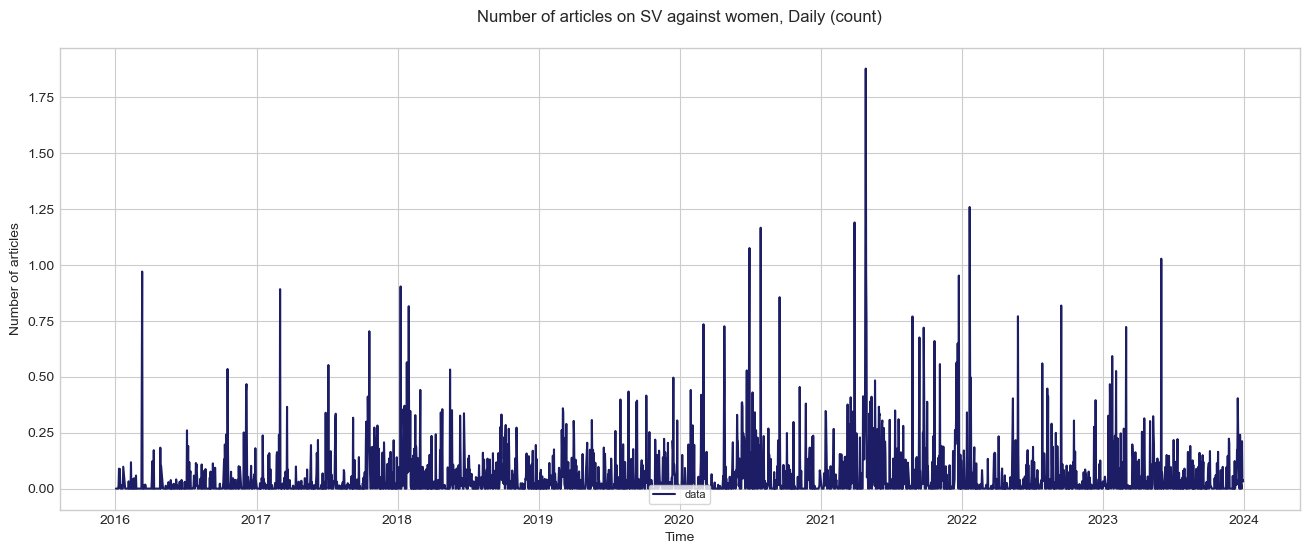

In [29]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(16, 6))
plt.plot(counts['date'], counts['0'].values, '#1D1D65', label='data')
plt.xlabel('Time')
plt.ylabel('Number of articles')
plt.title('Number of articles on SV against women, Daily (count)\n')
plt.legend(prop={'size': 8}, frameon=True, loc='lower center', ncol=2)
plt.savefig('daily.png')
plt.show()

In [30]:
dates_m = counts.groupby(pd.Grouper(key = 'date', freq='M')).mean().index
counts_m = pd.DataFrame(pd.DataFrame(counts.groupby(pd.Grouper(key = 'date', freq='M')).sum(),
                      columns = ['0']))
counts_m.insert(0, 'date', dates_m)
counts_m = counts_m.set_index(np.arange(0, counts_m.shape[0]))
counts_m

,date,0
0,2016-01-31,0.408455
1,2016-02-29,0.359537
2,2016-03-31,1.004429
3,2016-04-30,0.617941
4,2016-05-31,0.134336
...,...,...
91,2023-08-31,1.235709
92,2023-09-30,1.017146
93,2023-10-31,0.794291
94,2023-11-30,0.934792


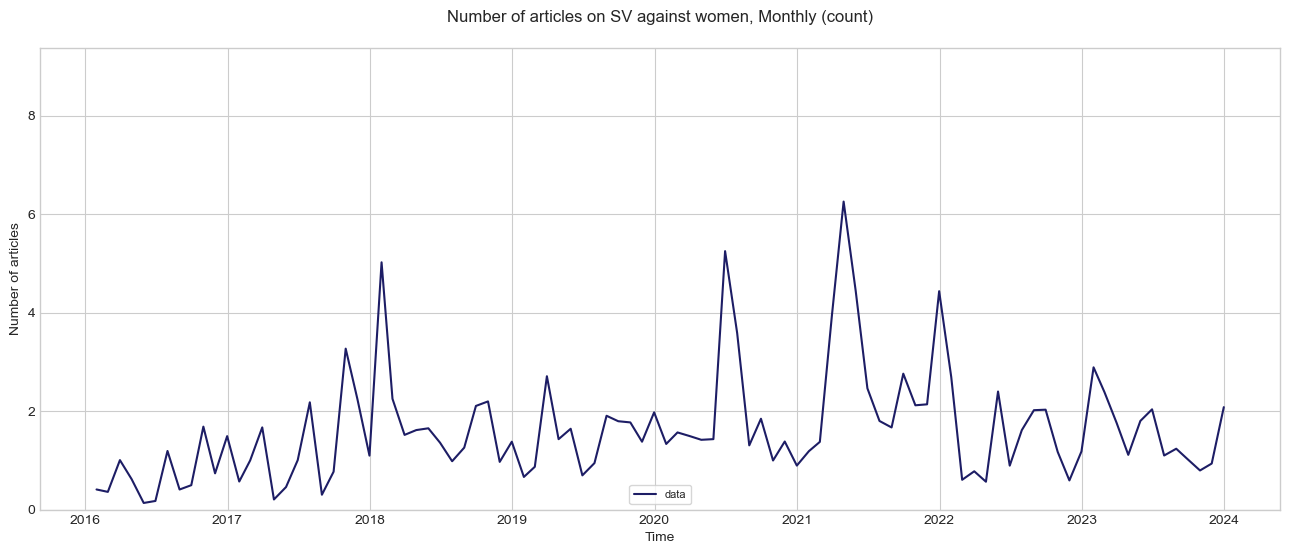

In [31]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(16, 6))
plt.plot(counts_m['date'], counts_m['0'].values, '#1D1D65', label='data')
plt.xlabel('Time')
plt.ylabel('Number of articles')
plt.title('Number of articles on SV against women, Monthly (count)\n')
plt.legend(prop={'size': 8}, frameon=True, loc='lower center', ncol=2)
plt.ylim(0, counts_m['0'].max()*1.5)
plt.show()

In [46]:
counts

,date,32
0,2016-01-03,0.000000
1,2016-01-04,0.000000
2,2016-01-05,0.000000
3,2016-01-06,0.000000
4,2016-01-07,0.000000
...,...,...
2592,2023-12-26,0.000000
2593,2023-12-27,0.019427
2594,2023-12-28,0.027956
2595,2023-12-29,0.000000


In [32]:
topics = ['top', 'sup0', 'sup1',
       'sup2', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32']

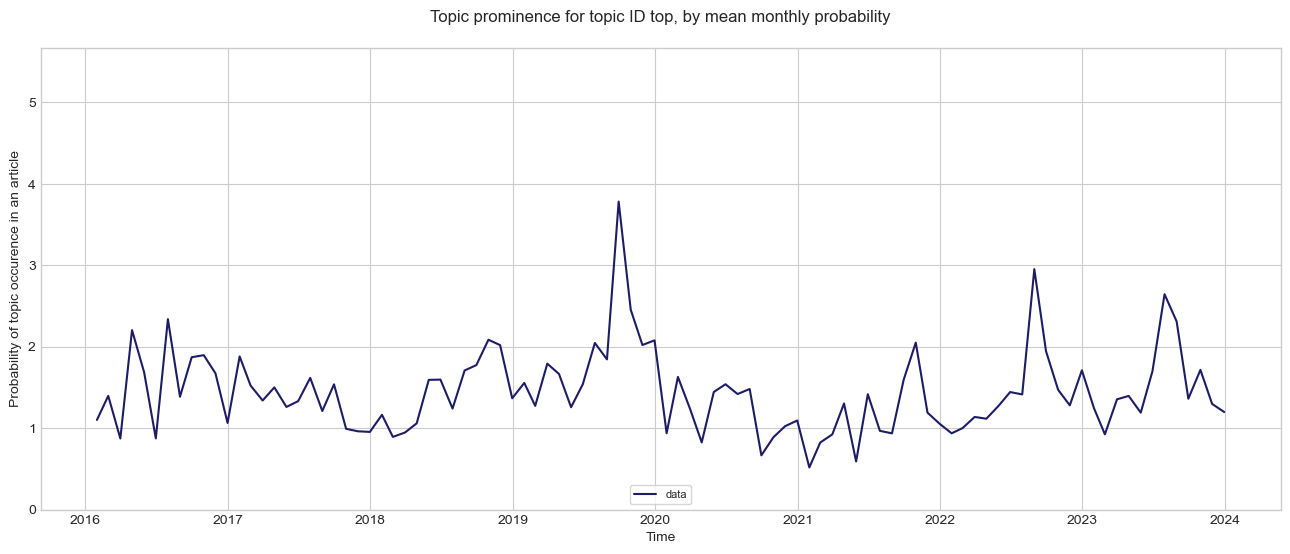

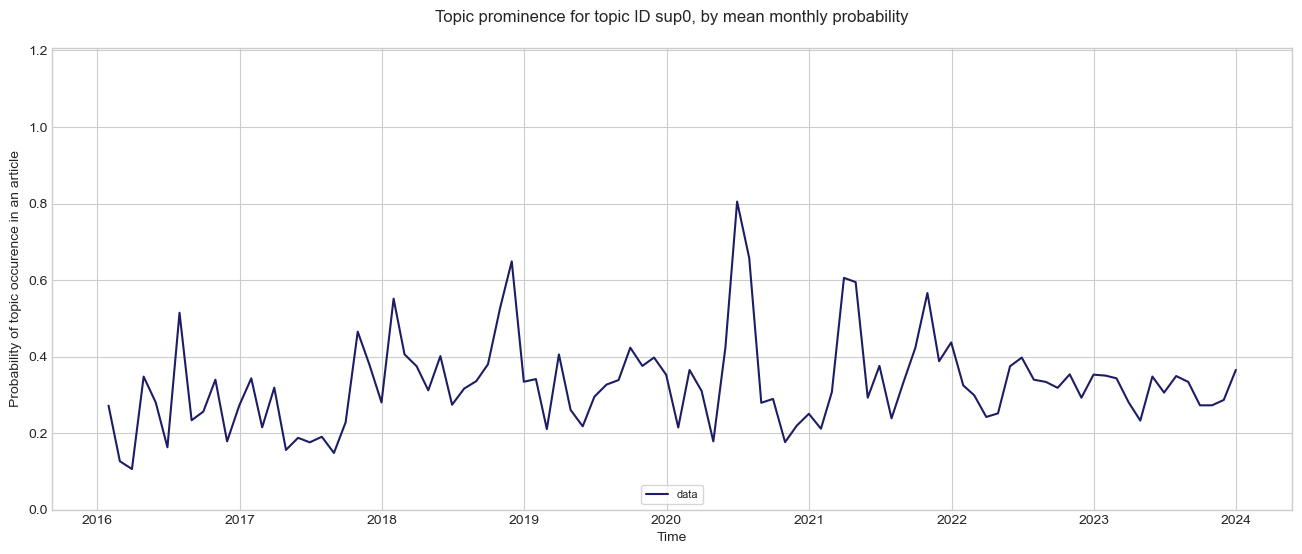

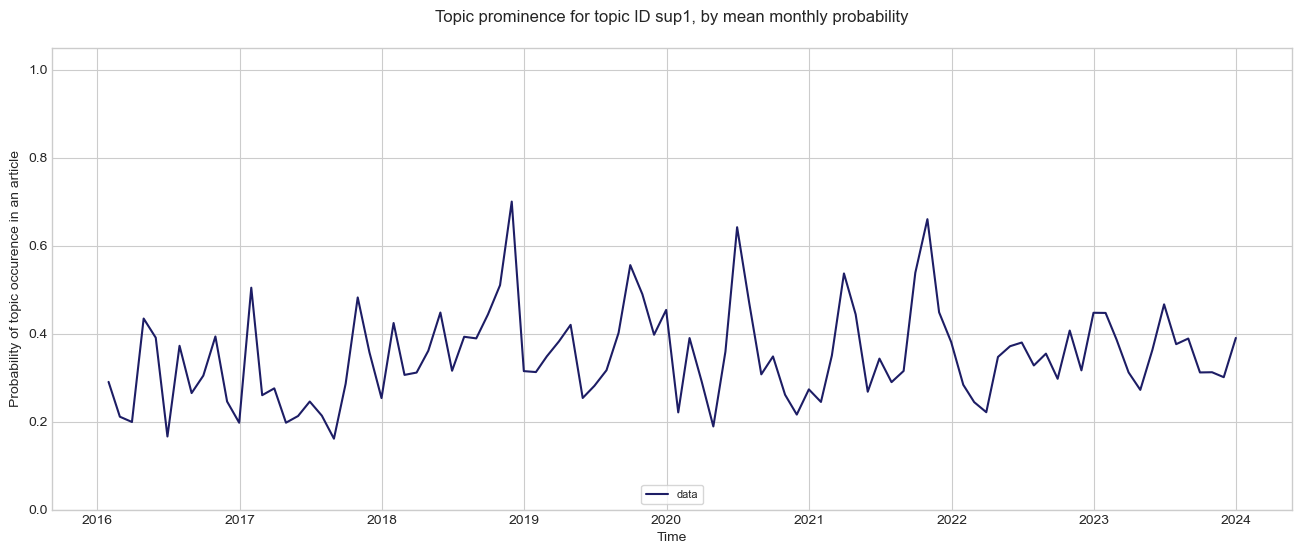

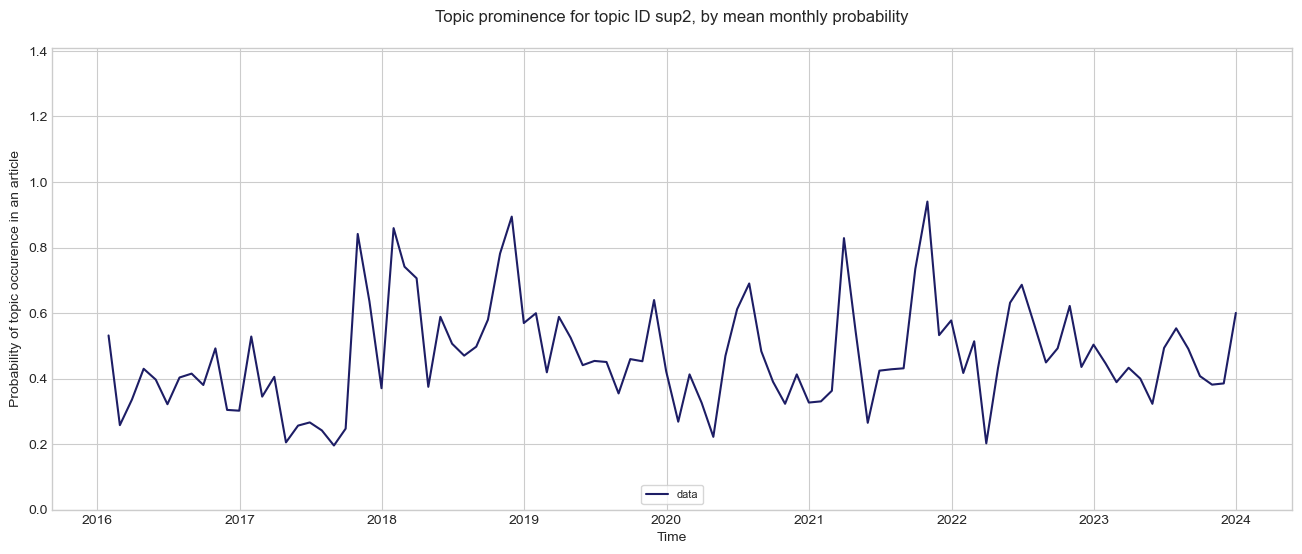

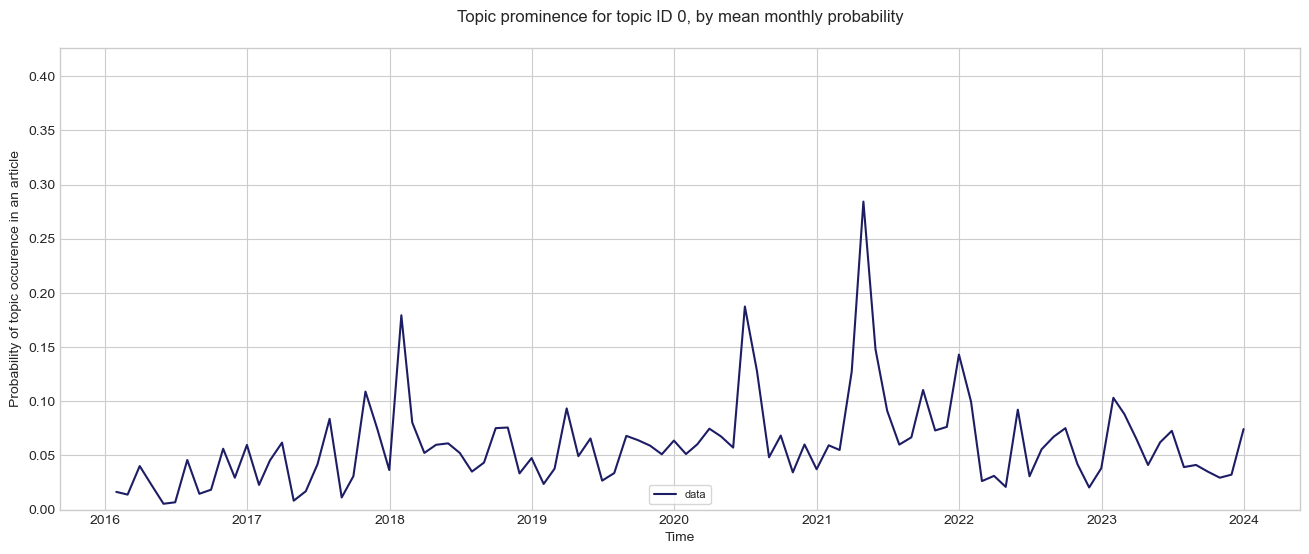

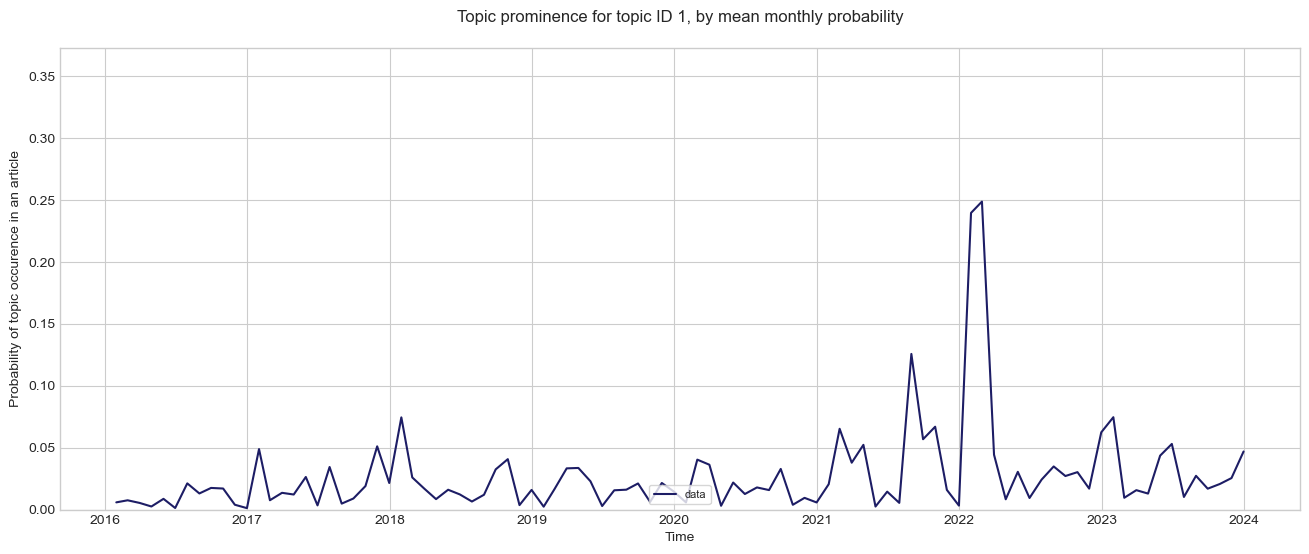

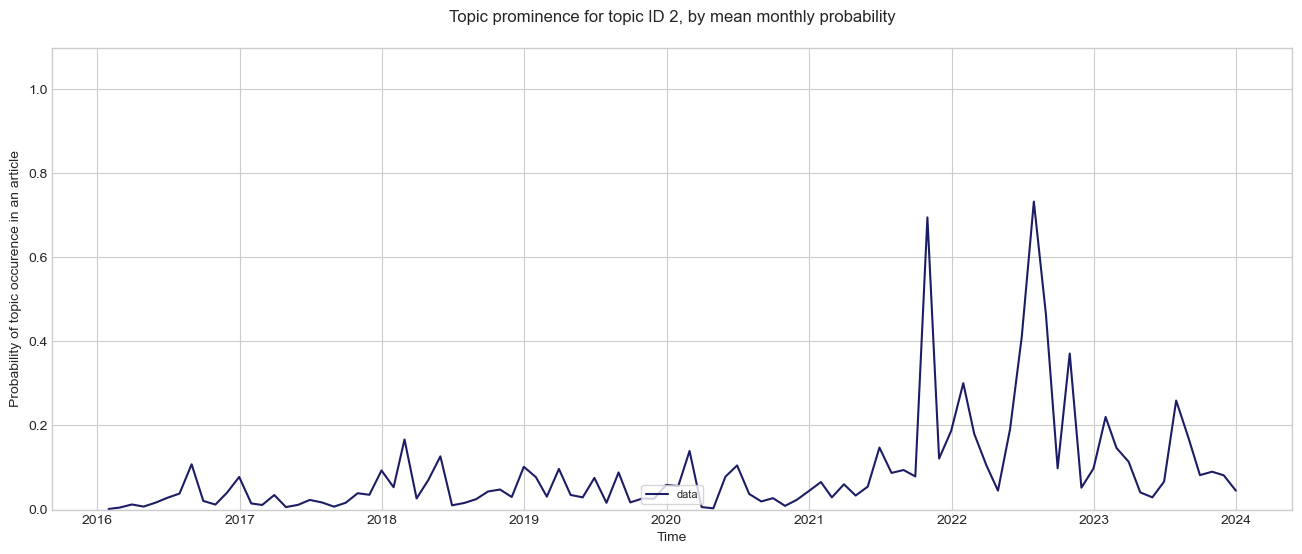

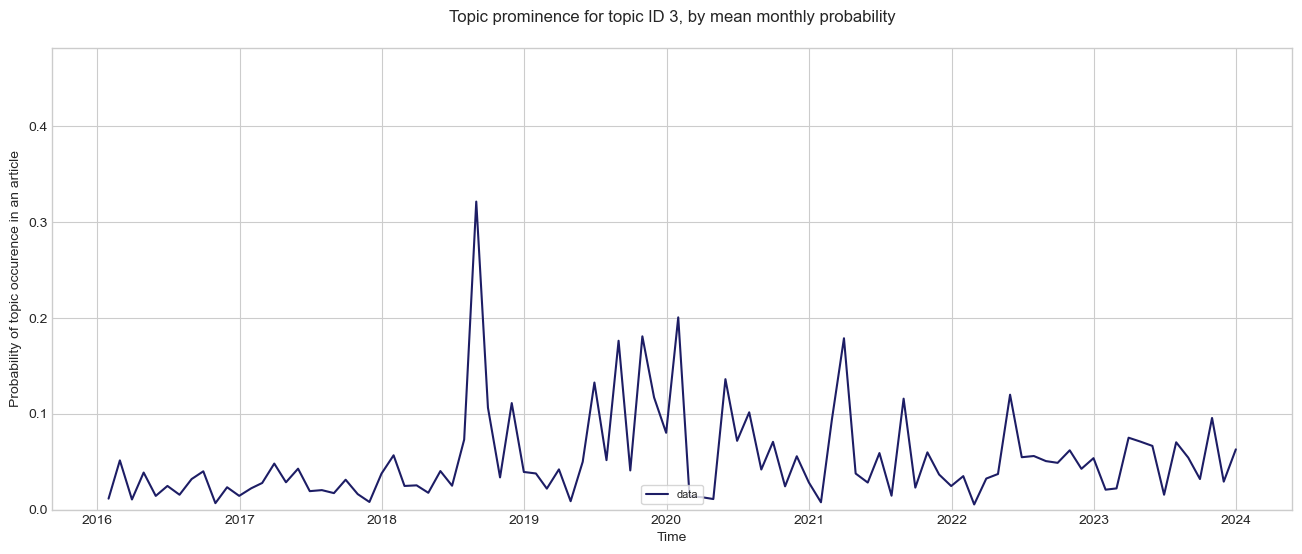

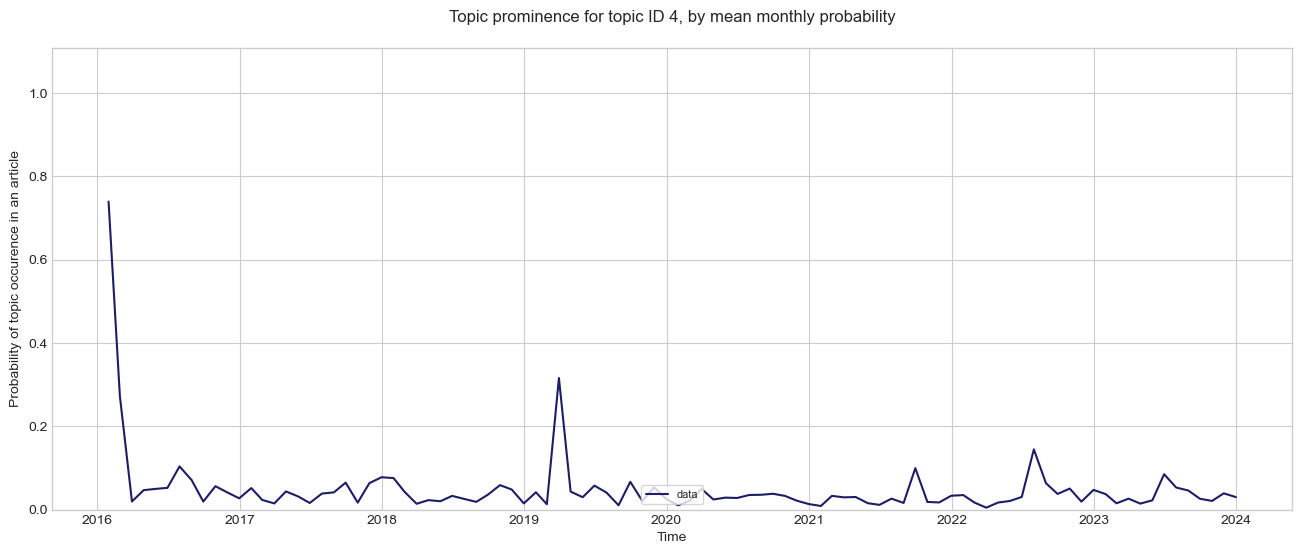

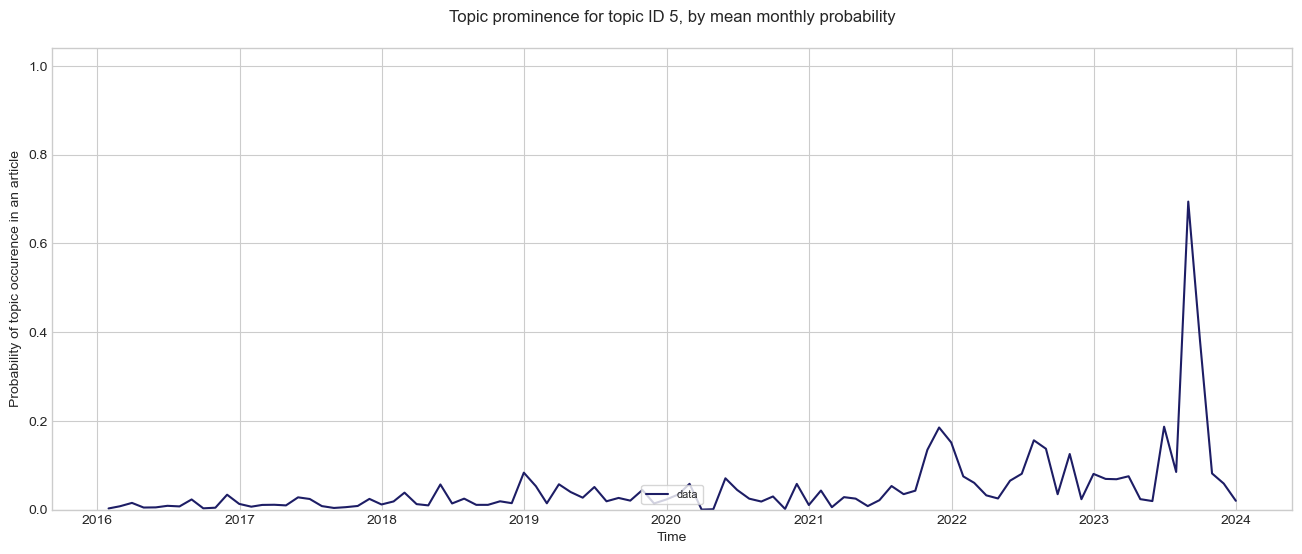

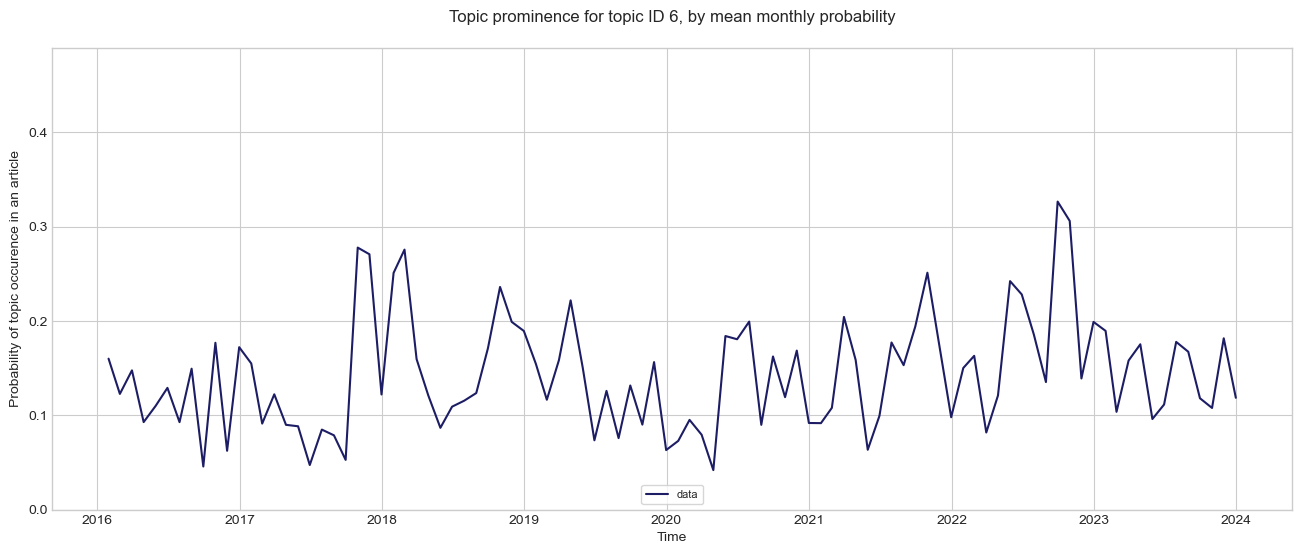

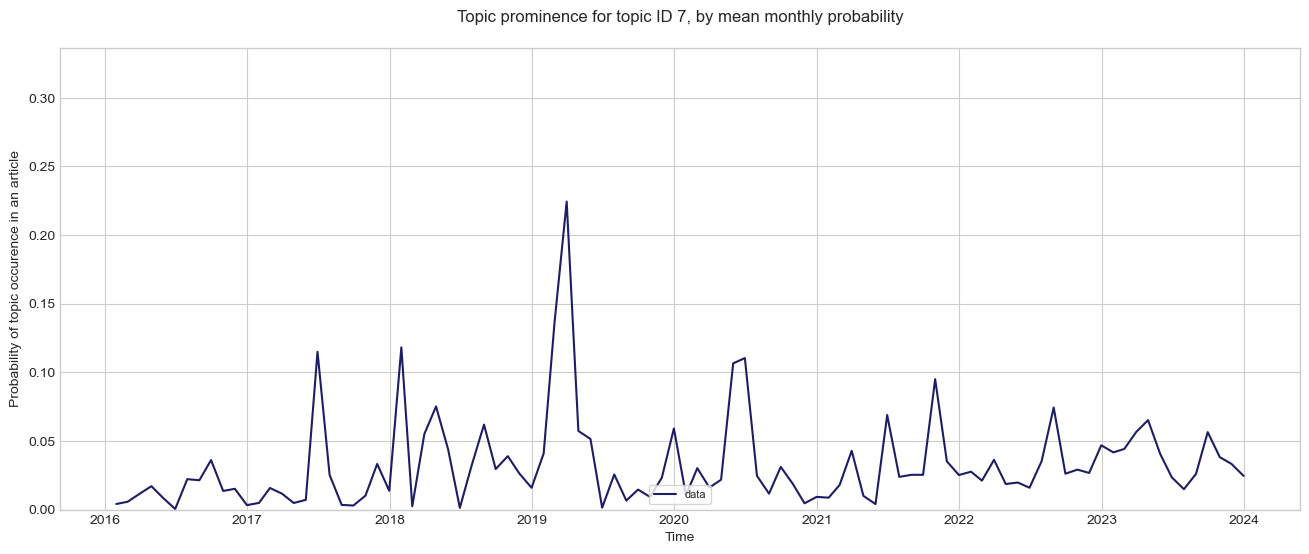

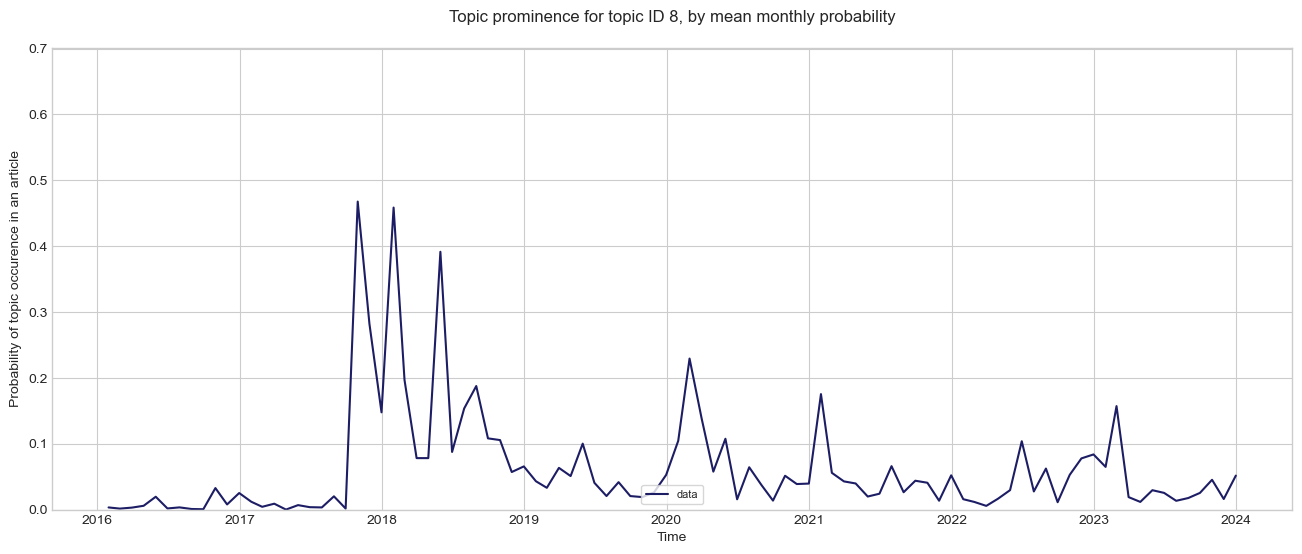

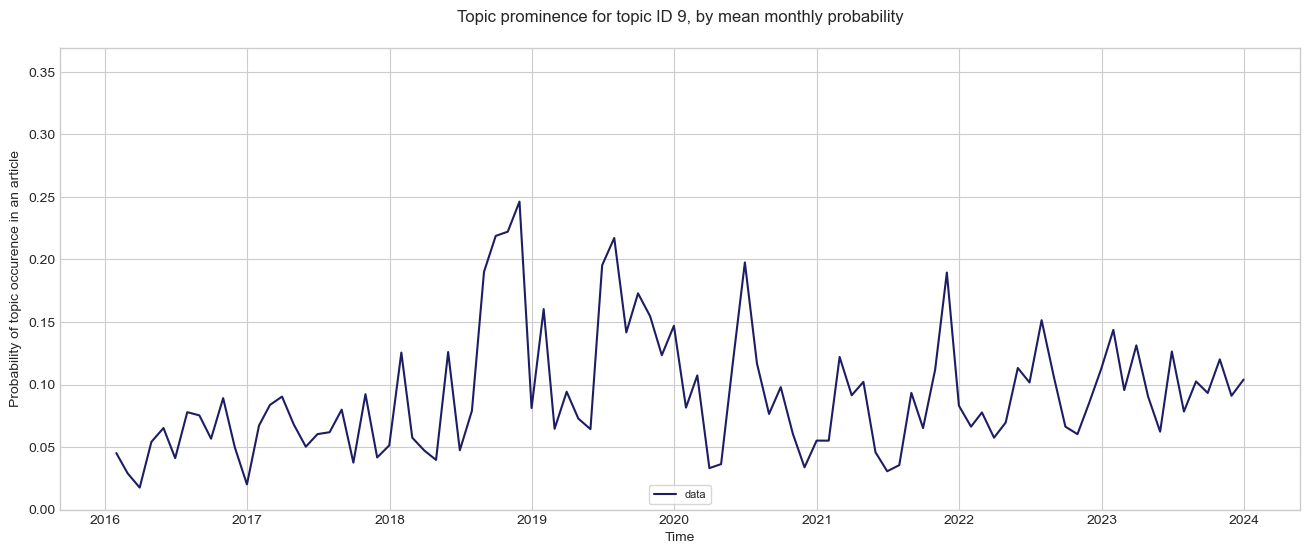

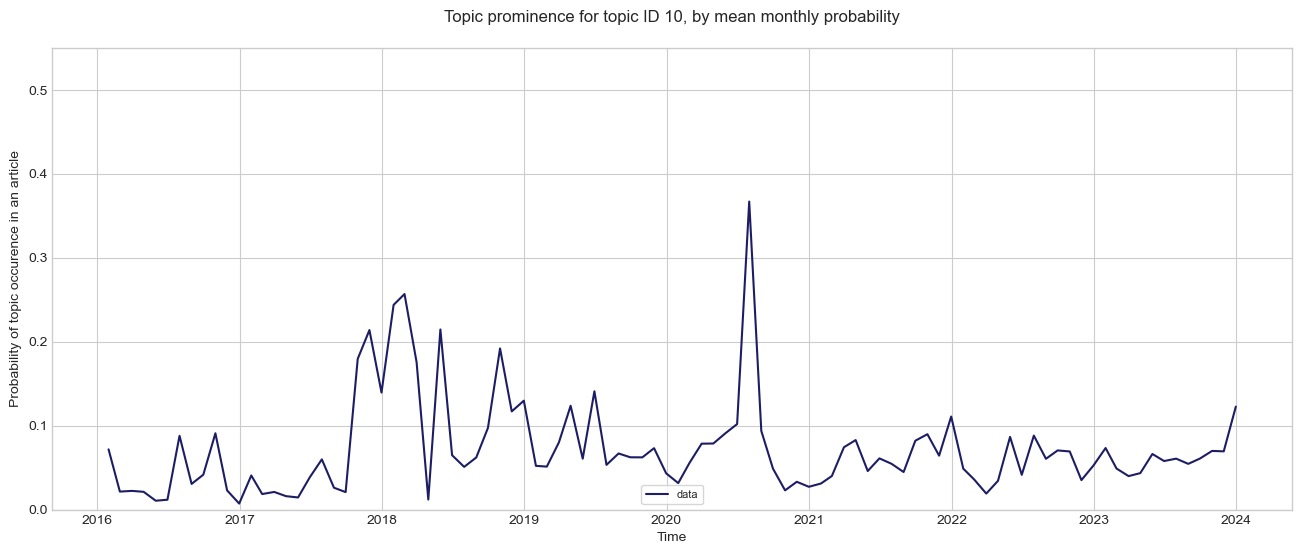

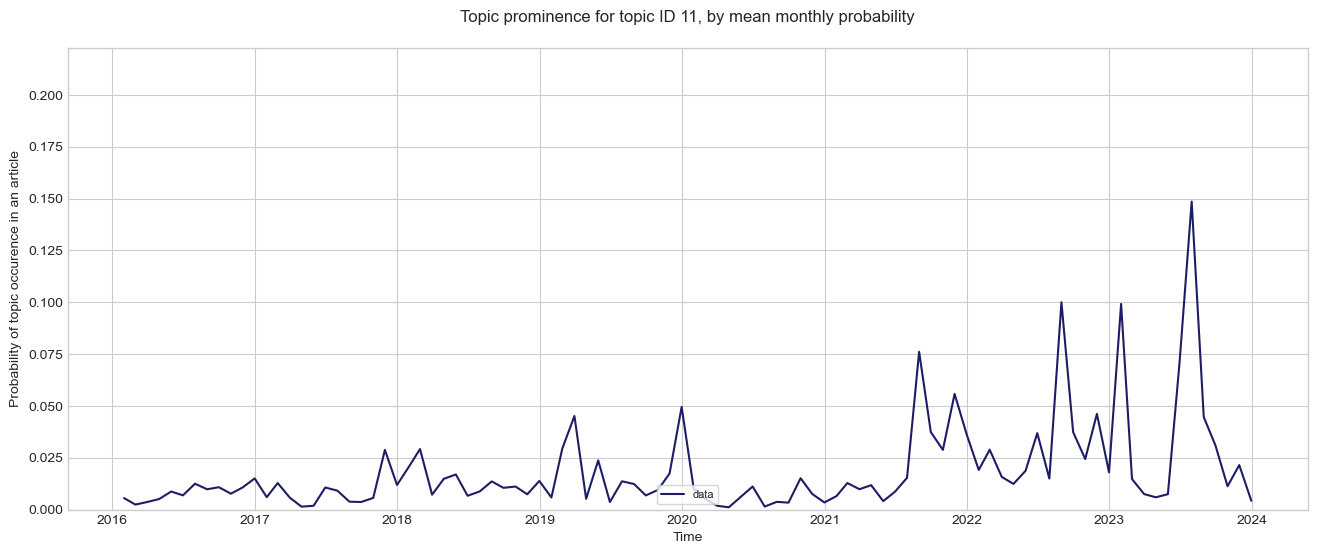

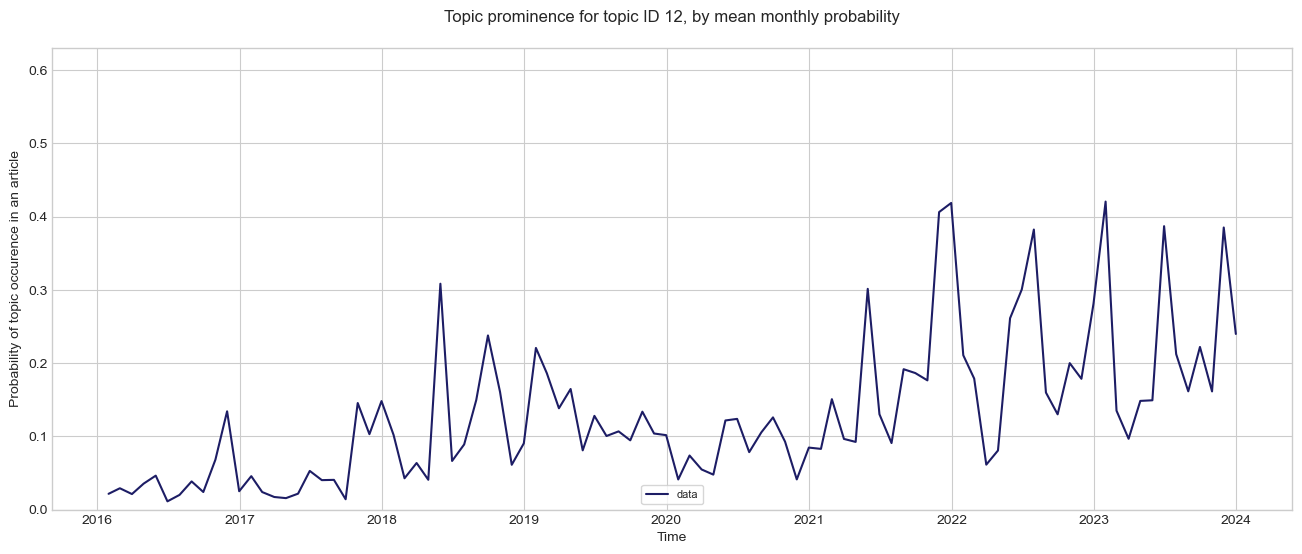

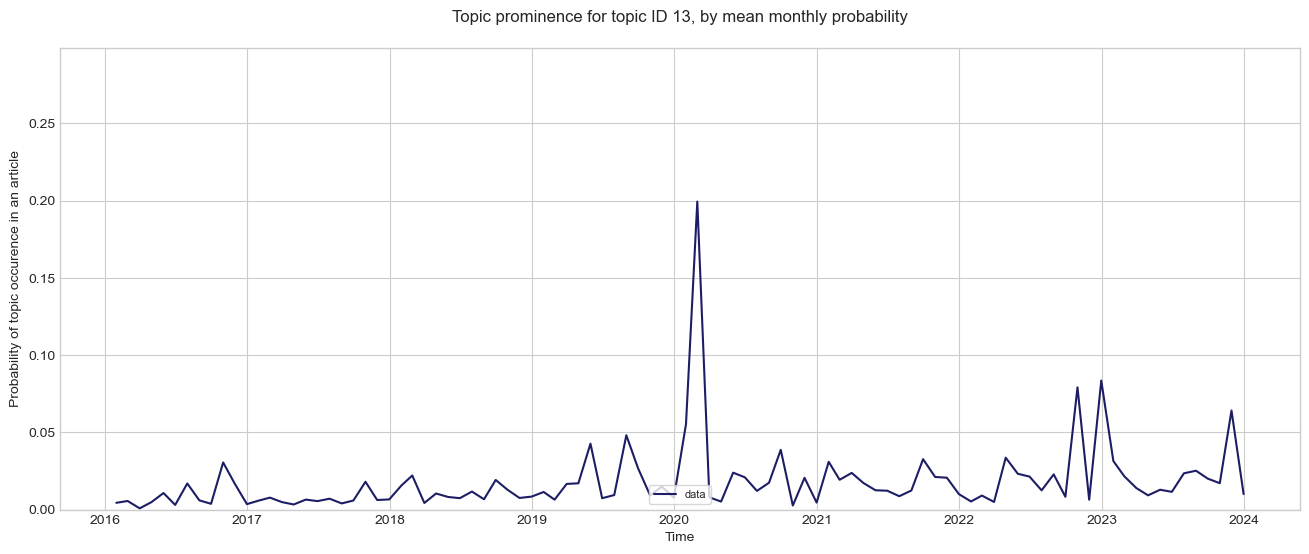

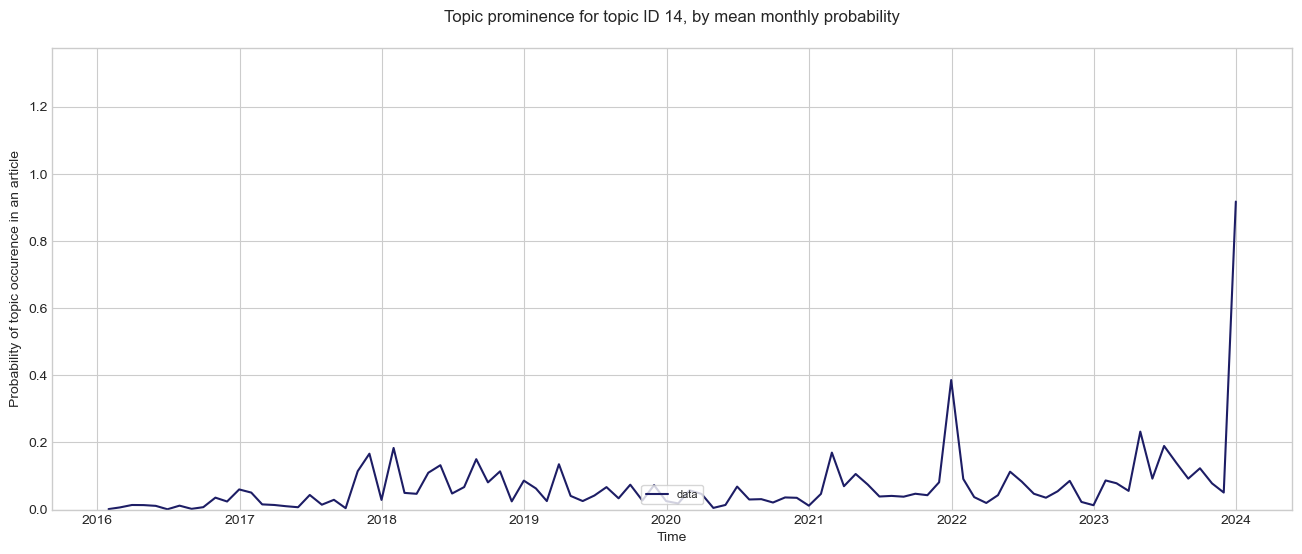

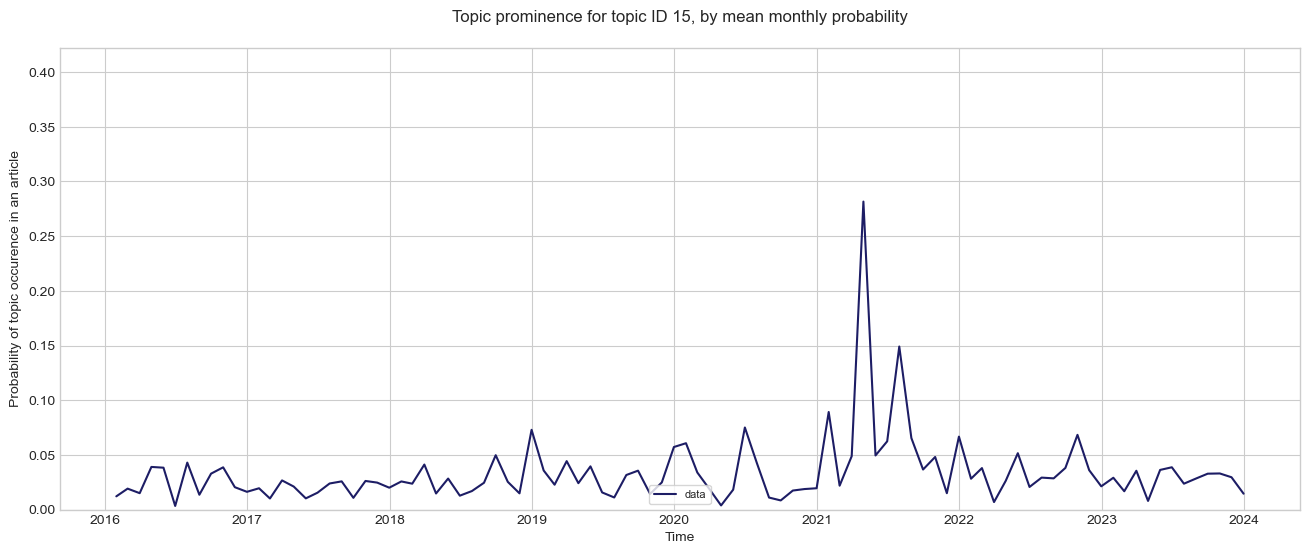

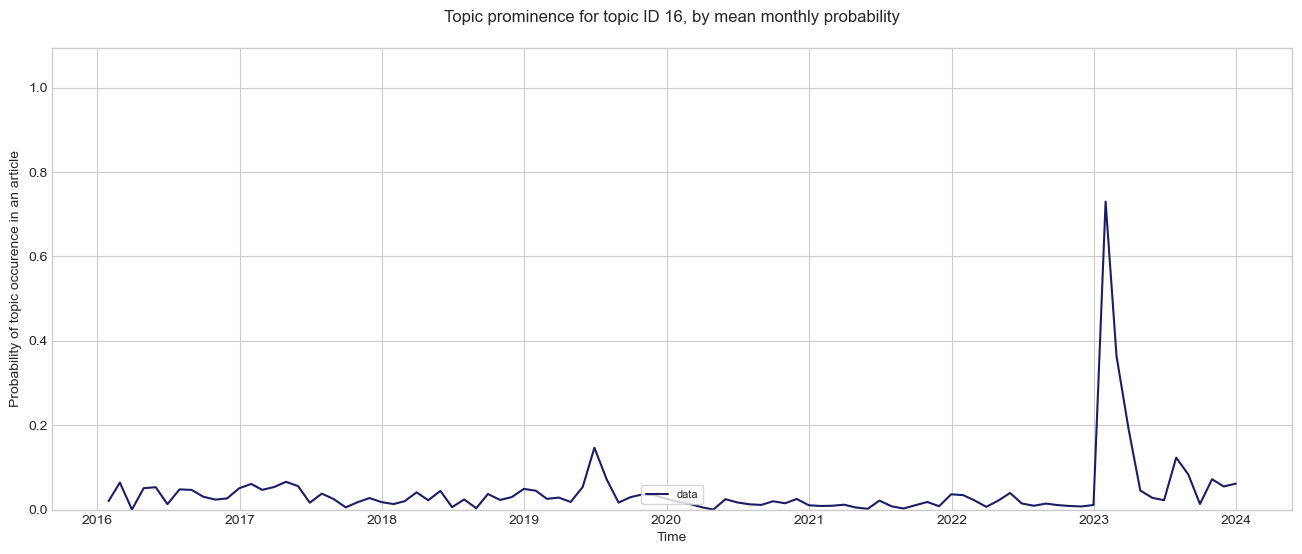

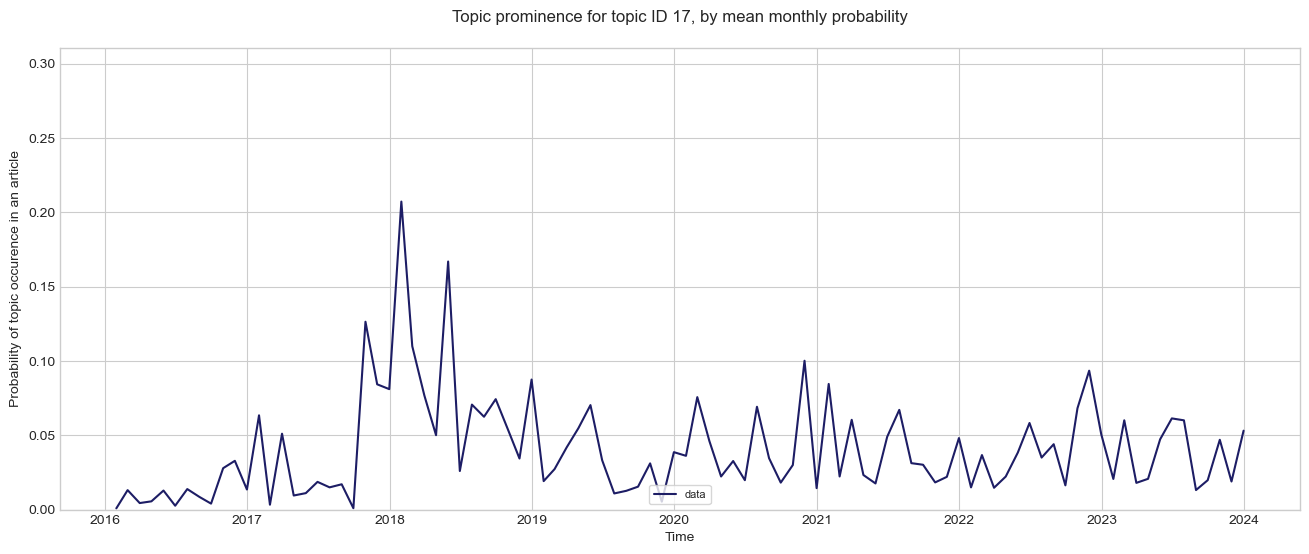

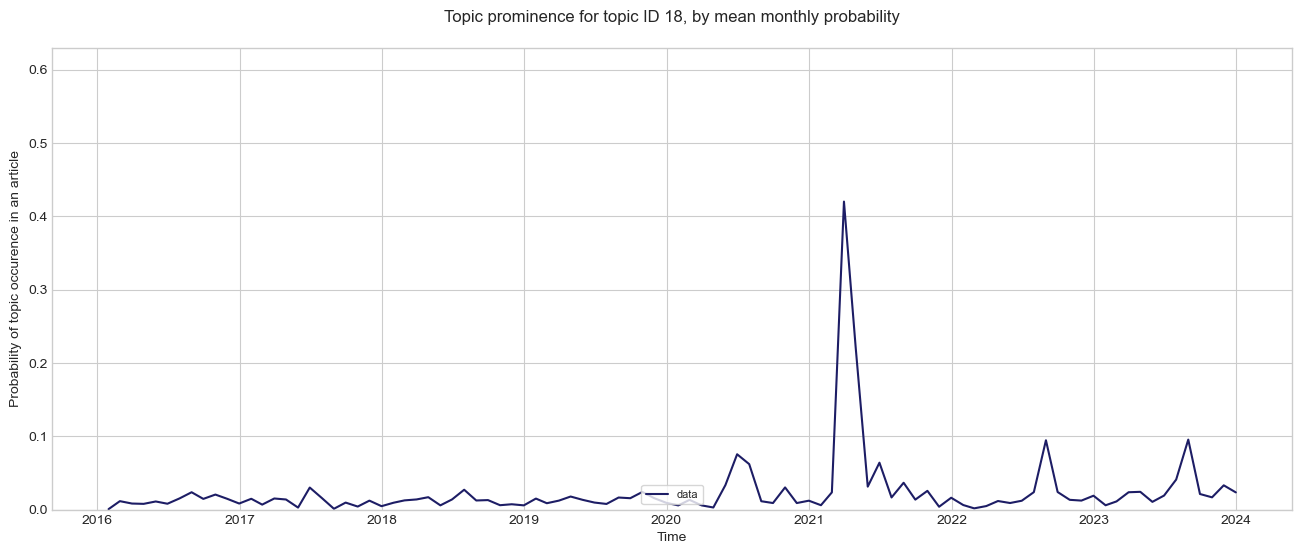

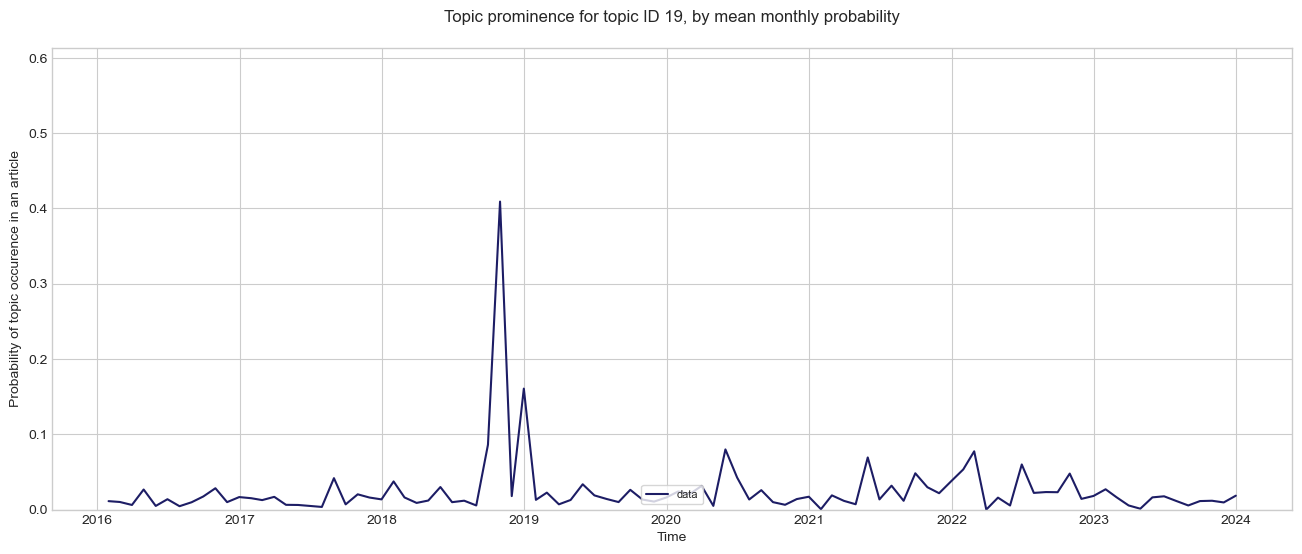

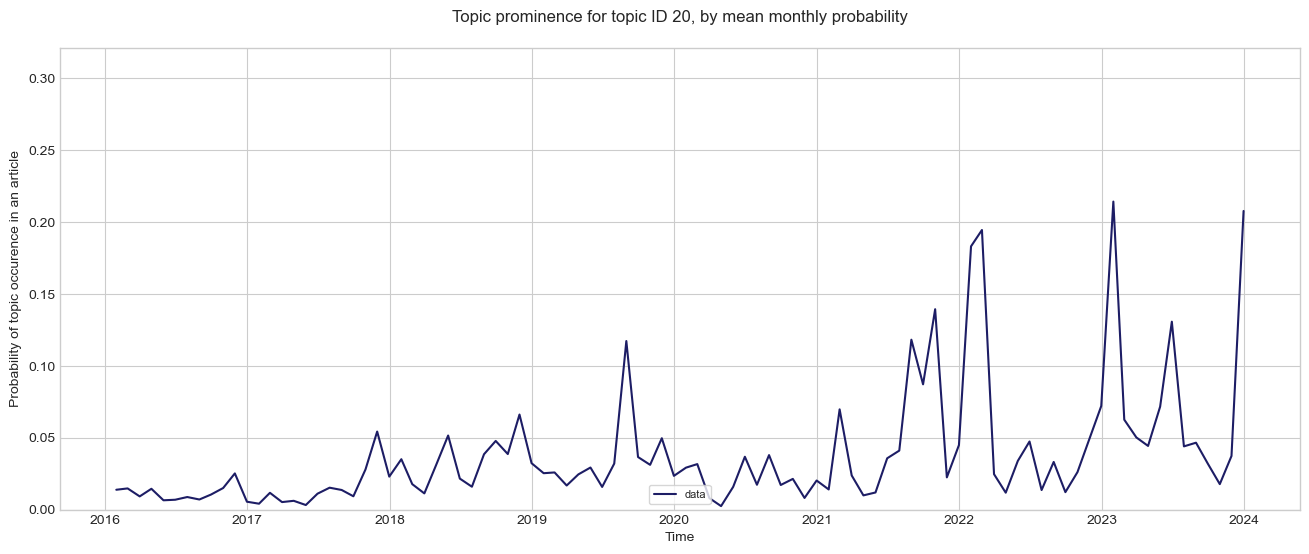

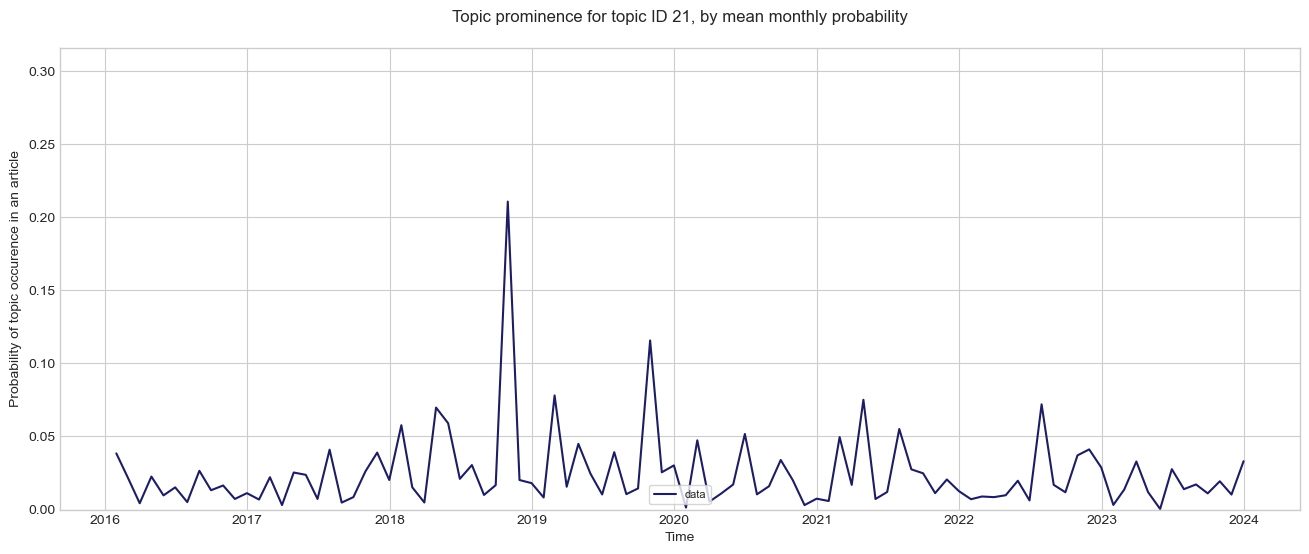

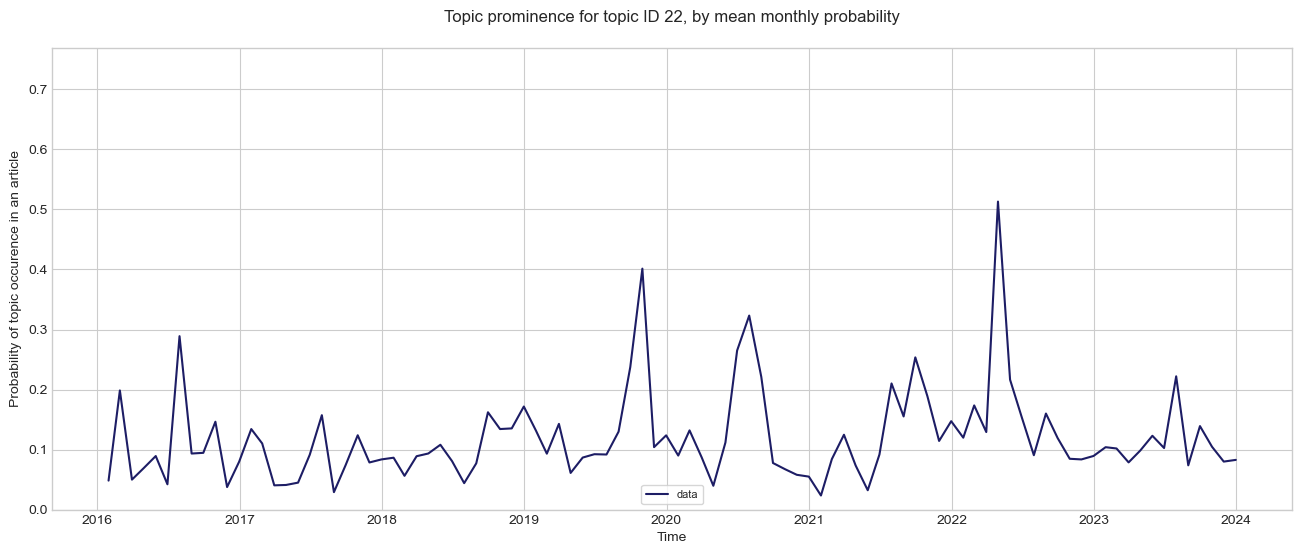

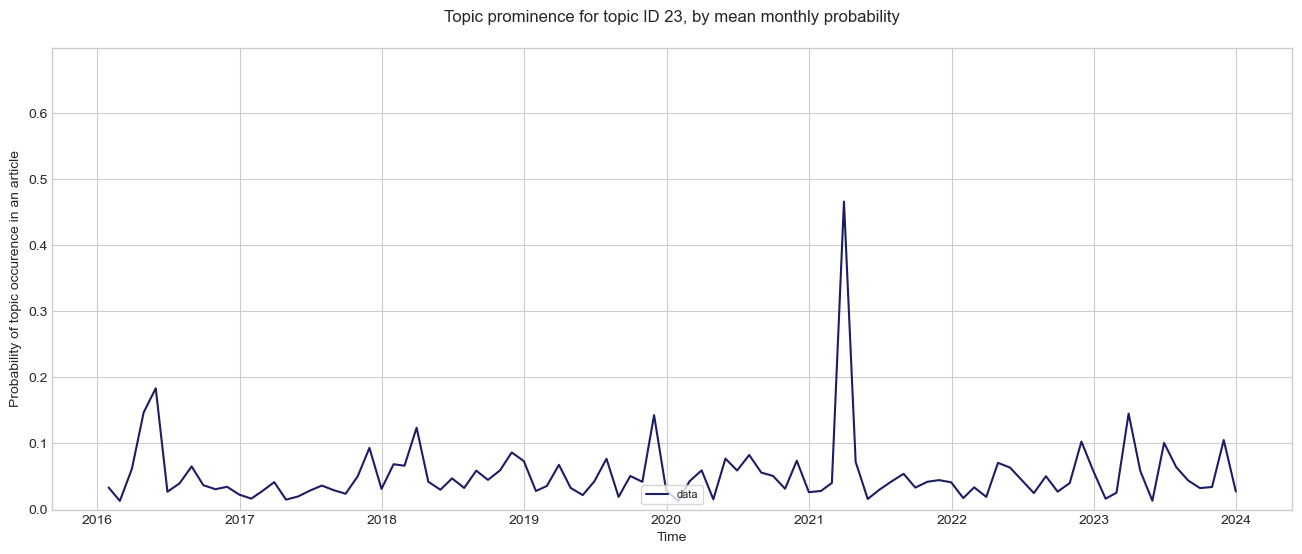

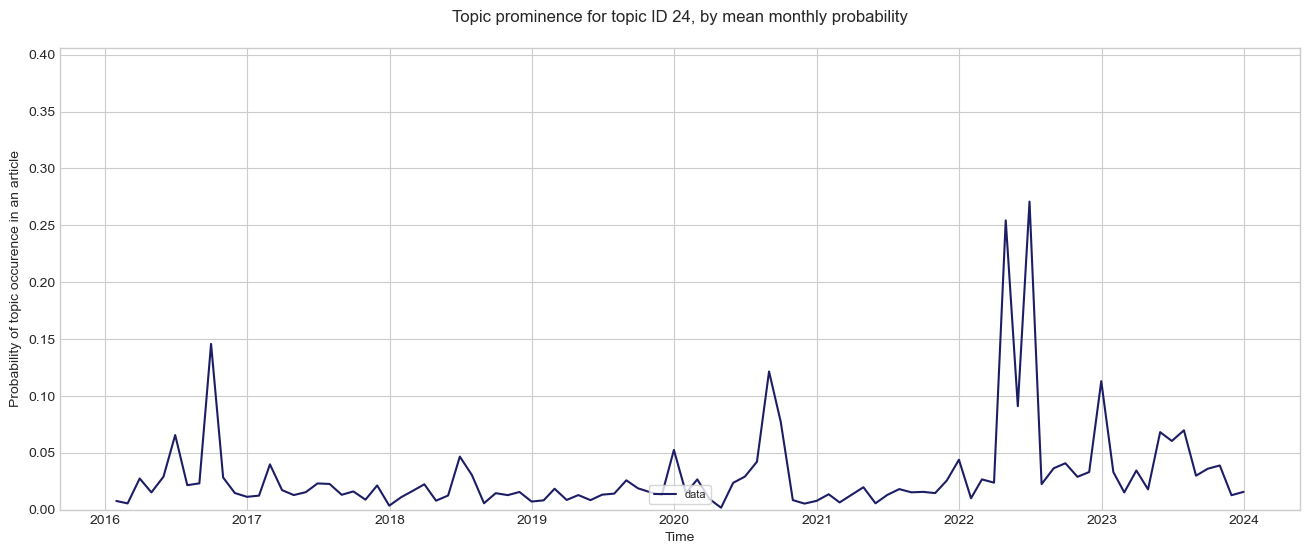

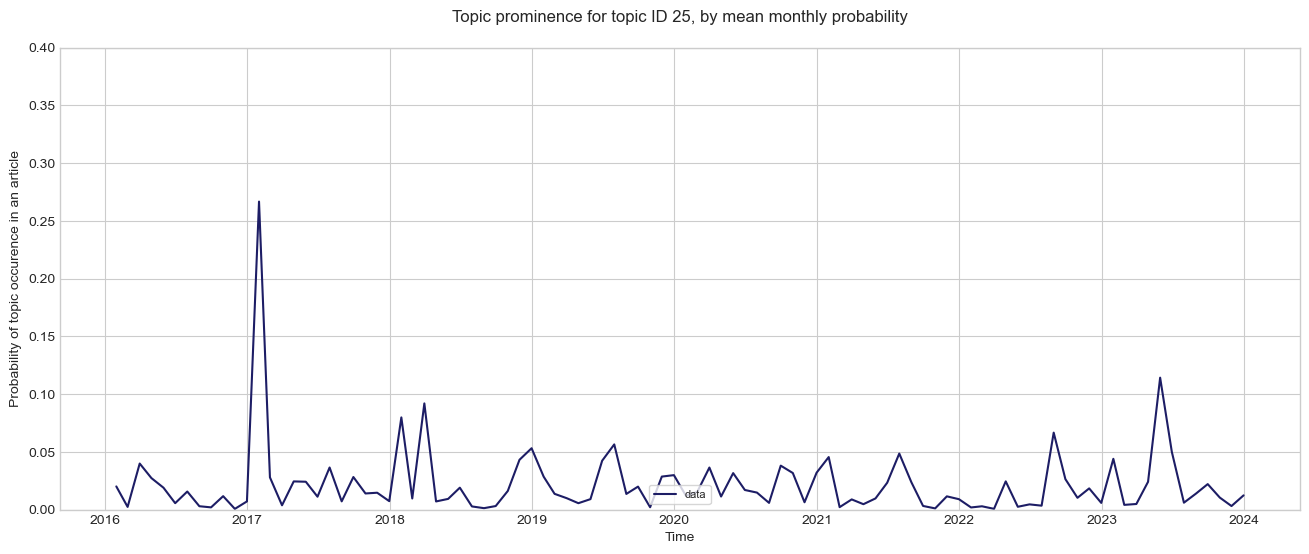

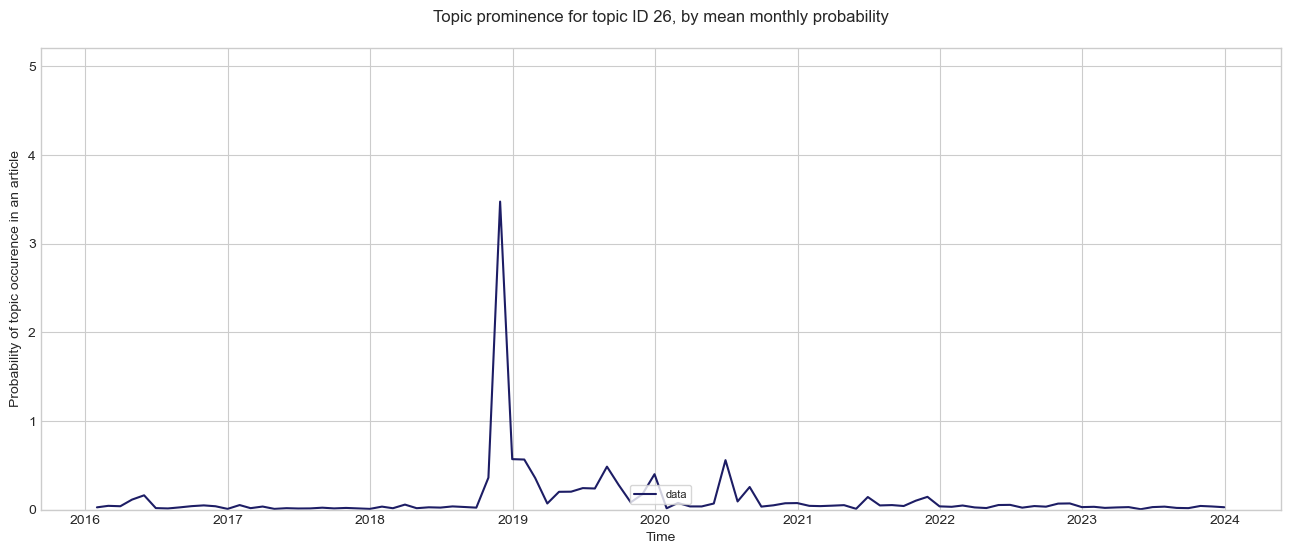

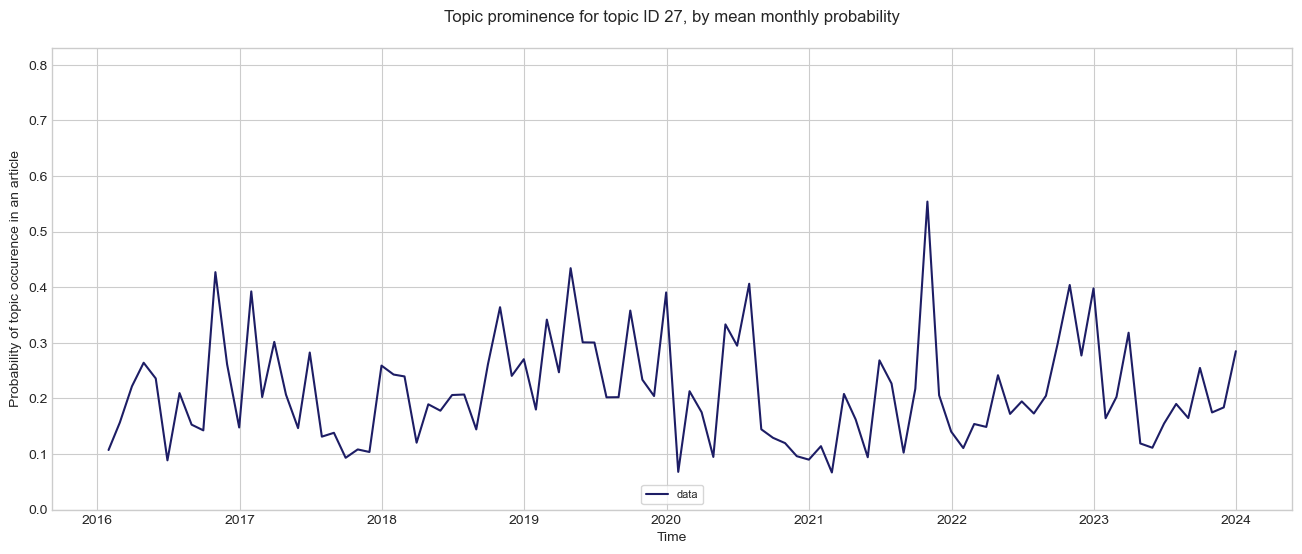

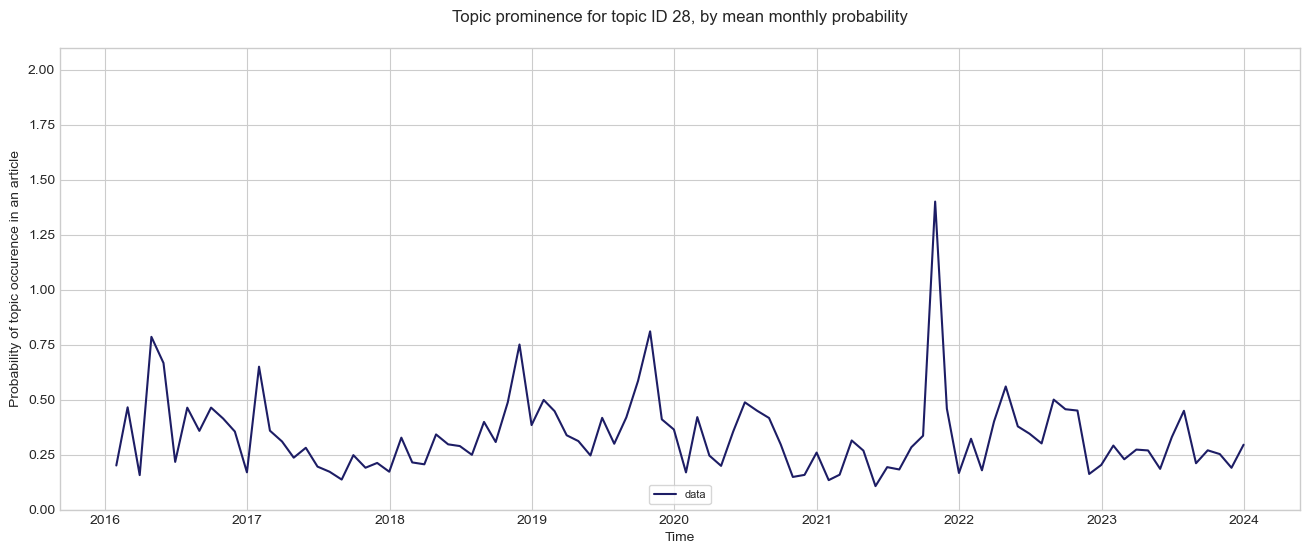

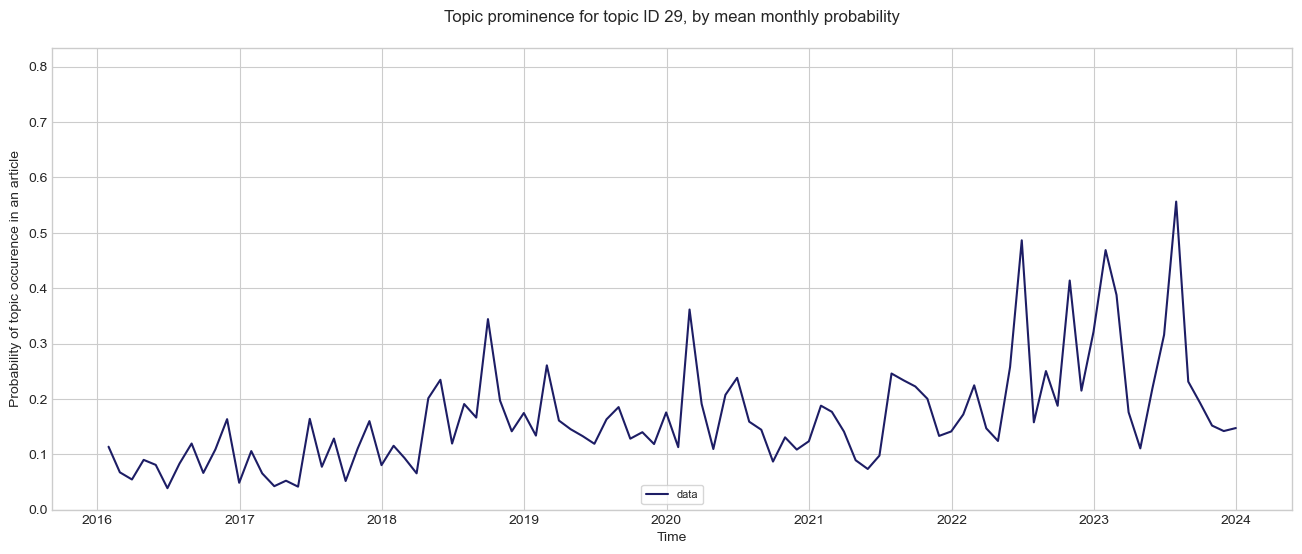

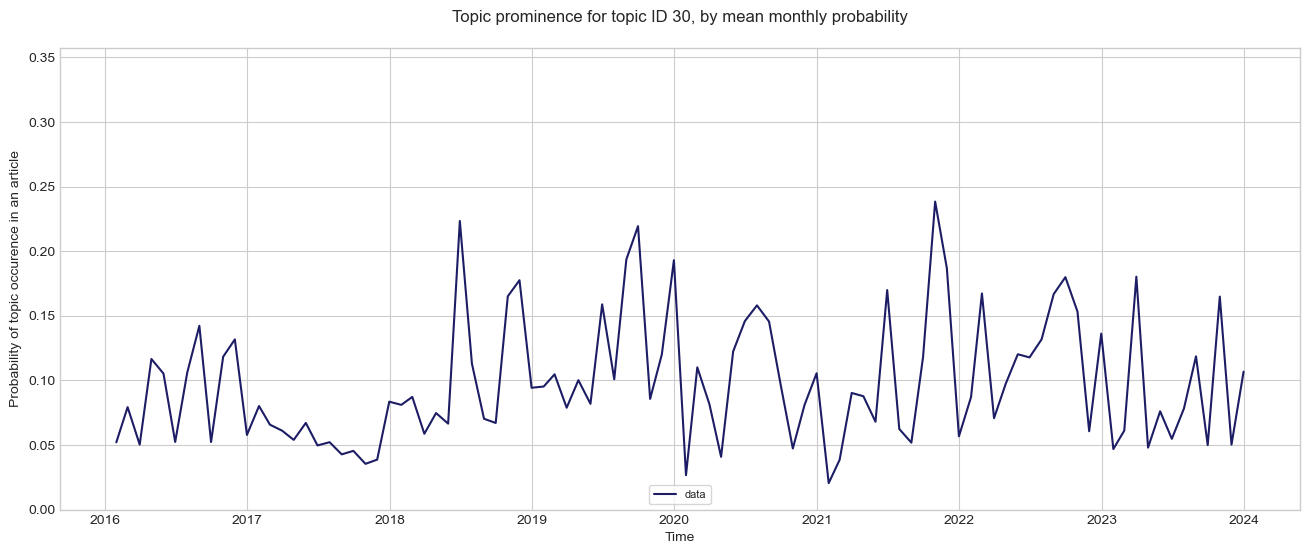

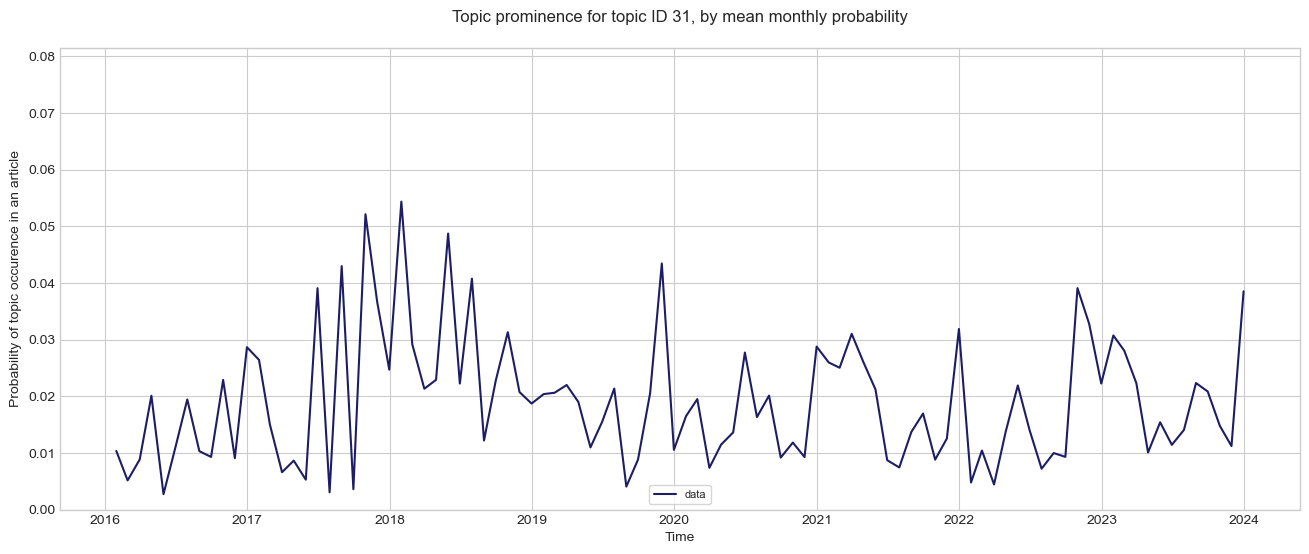

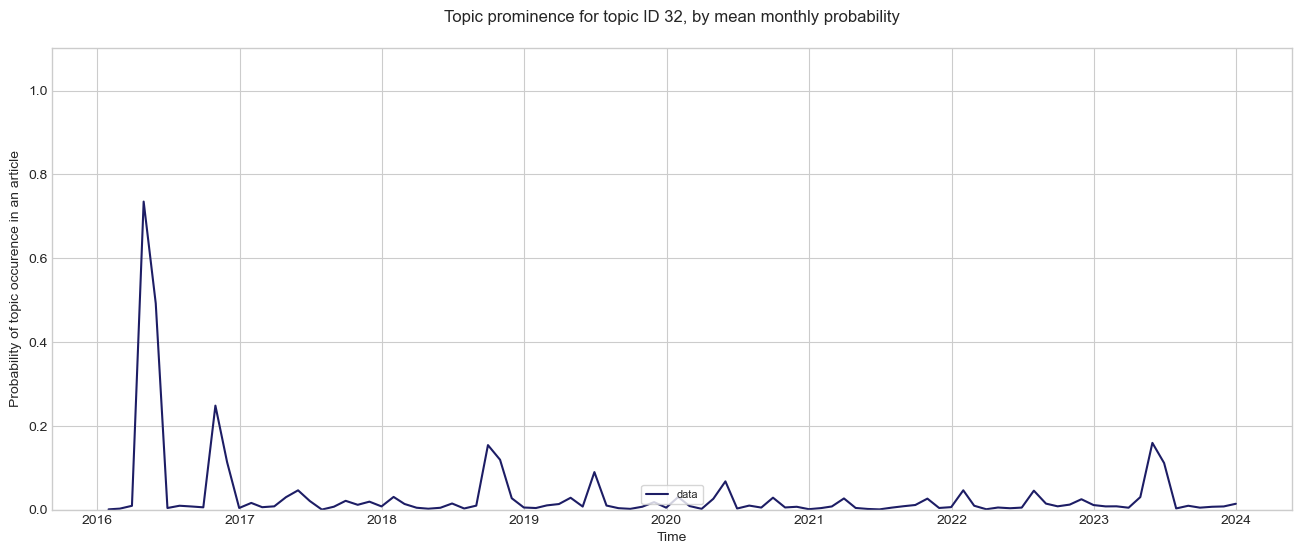

In [47]:
for topic in topics:

    counts = pd.DataFrame(pd.DataFrame((data[topic]).groupby(by=date).sum(),
                          columns = [topic]))
    counts.insert(0, 'date', dates)
    counts = counts.set_index(np.arange(0, counts.shape[0]))
    #counts[counts[topic] == 0] = np.nan
    
    dates_m = counts.groupby(pd.Grouper(key = 'date', freq='M')).mean().index
    counts_m = pd.DataFrame(pd.DataFrame(counts.groupby(pd.Grouper(key = 'date', freq='M')).mean(),
                          columns = [topic]))
    counts_m.insert(0, 'date', dates_m)
    counts_m = counts_m.set_index(np.arange(0, counts_m.shape[0]))
    
    plt.style.use('seaborn-v0_8-whitegrid')
    
    plt.figure(figsize=(16, 6))
    plt.plot(counts_m['date'], counts_m[topic].values, '#1D1D65', label='data')
    plt.xlabel('Time')
    plt.ylabel('Probability of topic occurence in an article')
    plt.title('Topic prominence for topic ID ' + topic + ', by mean monthly probability\n')
    plt.legend(prop={'size': 8}, frameon=True, loc='lower center', ncol=2)
    plt.ylim(0, counts_m[topic].max()*1.5)
    plt.savefig(topic + '.png')
    plt.show()

In [34]:
counts_m

,date,32
0,2016-01-31,0.013921
1,2016-02-29,0.059277
2,2016-03-31,0.225081
3,2016-04-30,19.845265
4,2016-05-31,12.303257
...,...,...
91,2023-08-31,0.273723
92,2023-09-30,0.133361
93,2023-10-31,0.181325
94,2023-11-30,0.217613
